In [15]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [16]:
import pandas as pd
import numpy as np
import xarray as xr
import numpy.ma as ma
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [17]:
# look through all NOAA insitu measurements,
# find corresponding model results
# store the values in the same file

In [18]:
year = 2018

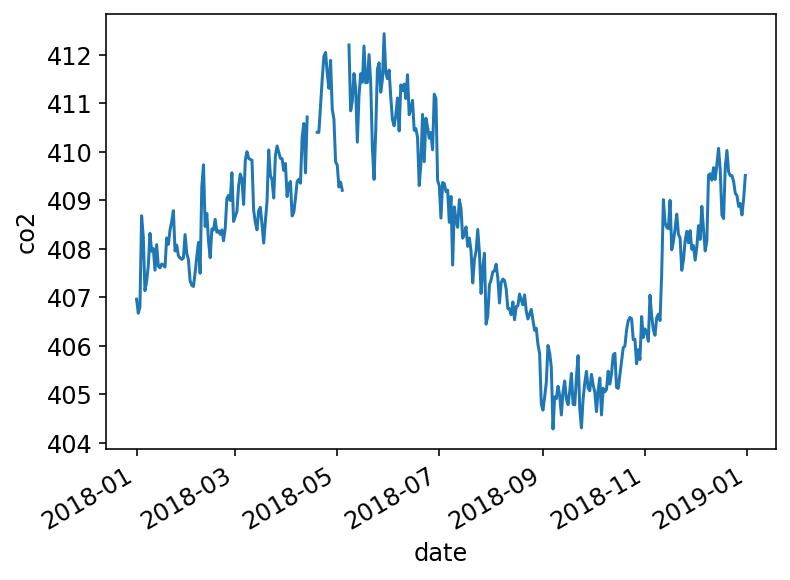

In [19]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
filename = '2018_daily_MLO.nc'
ds_obs = xr.open_dataset(file_dir + filename)
ds_obs['co2'].plot()

In [20]:
lon = ds_obs.attrs['site_longitude']
lat = ds_obs.attrs['site_latitude']
[lon,lat]

[-155.5763, 19.5362]

In [21]:
# model directory and file
mod_dir = '/geos/u73/msadiq/co2_data/co2_2015_2018/'
mod_file = 'liang_2018.nc'
ds_mod = xr.open_dataset(mod_dir + mod_file)
dr = ds_mod['co2']
dr

<xarray.DataArray 'co2' (record: 365, level: 47, latitude: 46, longitude: 72)>
[56817360 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -175.0 -170.0 ... 165.0 170.0 175.0
  * latitude   (latitude) float32 -89.0 -86.0 -82.0 -78.0 ... 82.0 86.0 89.0
  * level      (level) float32 0.0 1.0 2.0 3.0 4.0 ... 42.0 43.0 44.0 45.0 46.0
Dimensions without coordinates: record
Attributes:
    _fill_value:    -999.0
    units:          v/v
    long_name:      CO2 mixing ratio
    standard_name:  mole_fraction_of_carbon_dioxide_in_air

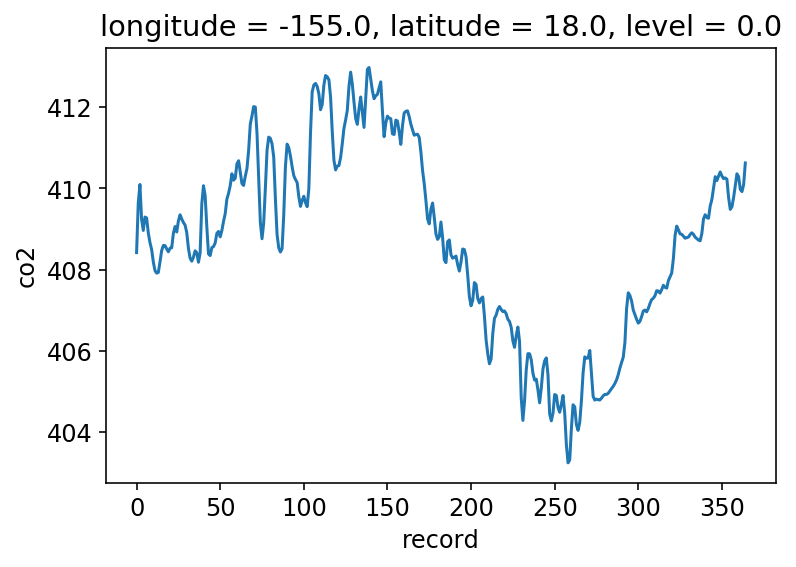

In [22]:
daily_co2_mod = dr[:,0,:,:]
ts_model = daily_co2_mod.sel(longitude = lon, latitude = lat, method='nearest')*1e6
ts_model.plot()

In [23]:
ds_obs['obs'] = ds_obs['co2']
ds_obs['mod'] = ds_obs['co2']
ds_obs['mod'].values = ts_model.values

obs_series = ds_obs['obs'].values
model_series = ds_obs['mod'].values
R = ma.corrcoef(ma.masked_invalid(obs_series), ma.masked_invalid(model_series))

format_R = float("{0:.2f}".format(R[0,1]))
format_R

0.91

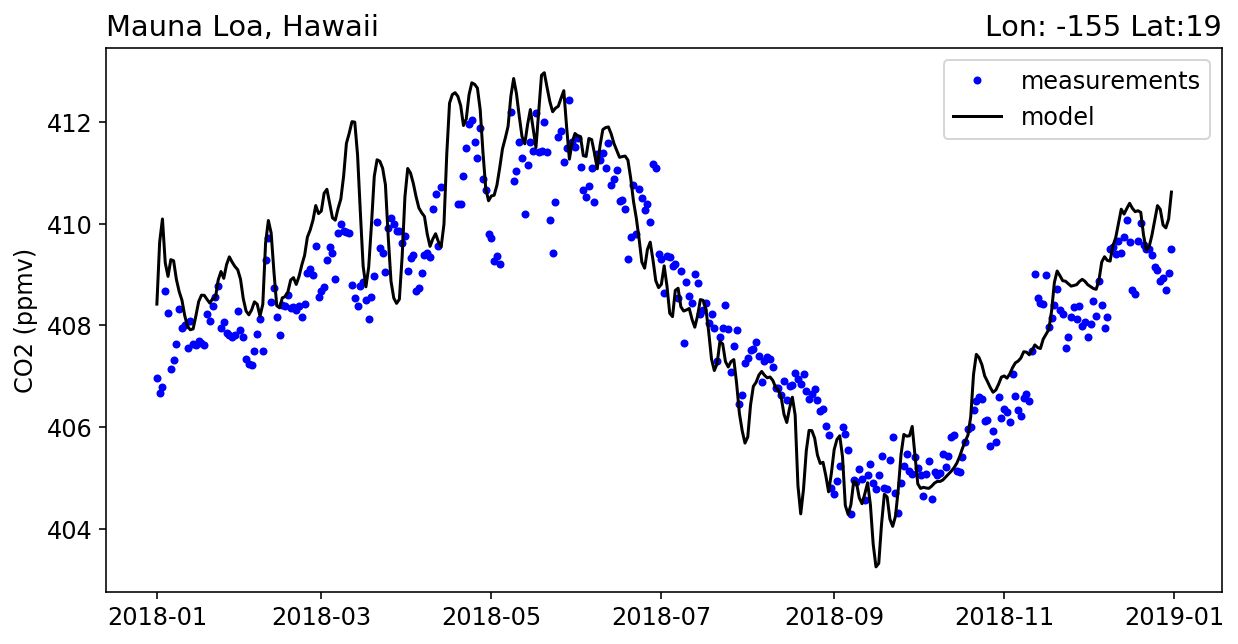

In [24]:
fig = plt.figure(figsize=[10,5])
plt.plot(ds_obs.date, ds_obs['obs'], 'b.', label = 'measurements')
plt.plot(ds_obs.date, ds_obs['mod'], 'black', label = 'model')
plt.legend()
plt.title(ds_obs.attrs['site_name'], loc='left') 
plt.title('Lon: ' + str(int(lon)) + ' Lat:' + str(int(lat)), loc='right')
plt.ylabel('CO2 (ppmv)')

fig.savefig(mod_dir + '/plots/' + str(year) + '_' + ds_obs.attrs['site_code'] + '_mod_vs_obs.png', dpi=300)

In [25]:
# do the above calculations for all of sites

In [26]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
file1 = open(file_dir + 'filenames', 'r')
lines = file1.readlines()

-0.11
0.99
0.59
0.92
0.17
0.97
0.61
0.98
0.96
0.83
0.85
0.79
0.37
0.72
0.55
0.84
0.7
0.82
0.86
0.41
0.57
0.83
-0.03
0.88
0.0
0.56
0.58
0.85
0.88
0.94
0.76
0.74
0.62
0.89
0.74
0.75
0.88
0.44
0.63
0.74
0.82
0.82
0.28
0.91
0.94
0.85
0.89
0.81
0.68
0.92
0.46
0.75
0.83
0.78
0.52
0.74
0.88
0.75
1.0
-0.08
0.84
0.92
0.99
0.88
0.68
0.72
0.92
0.66
0.77
0.98


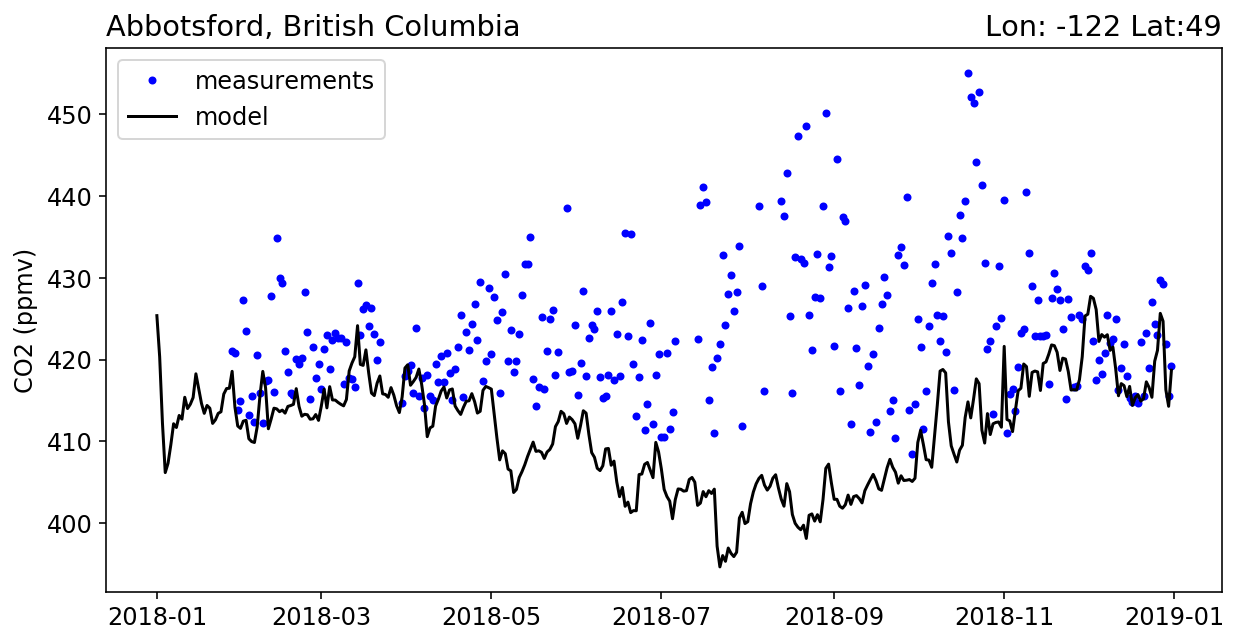

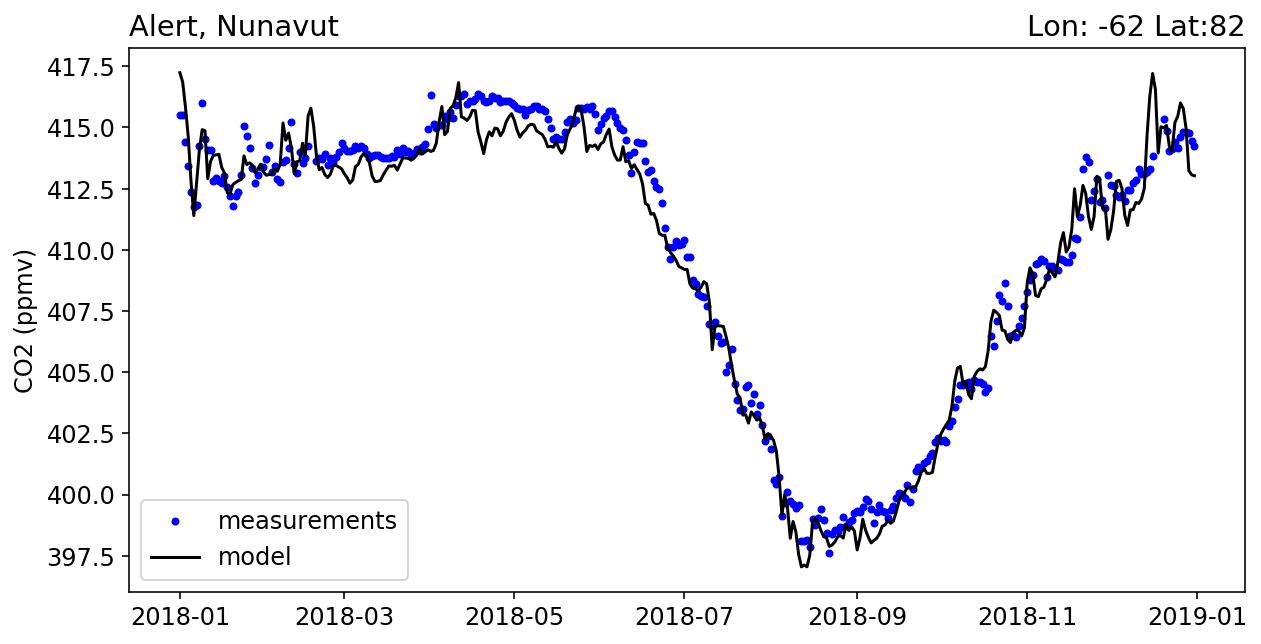

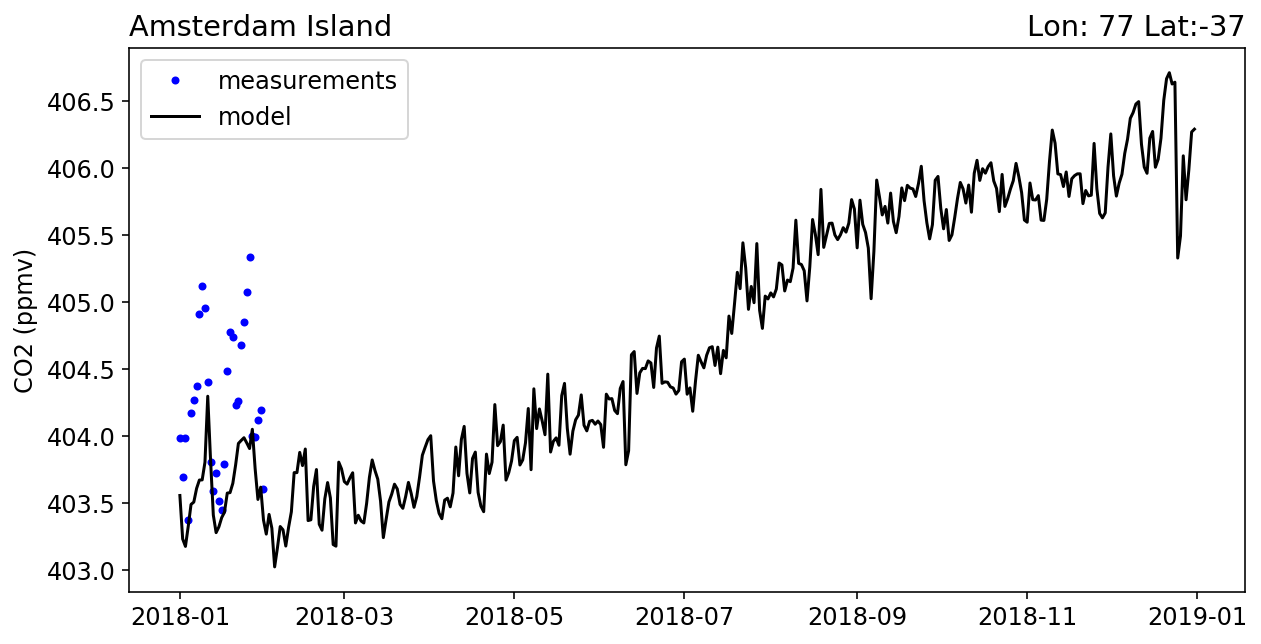

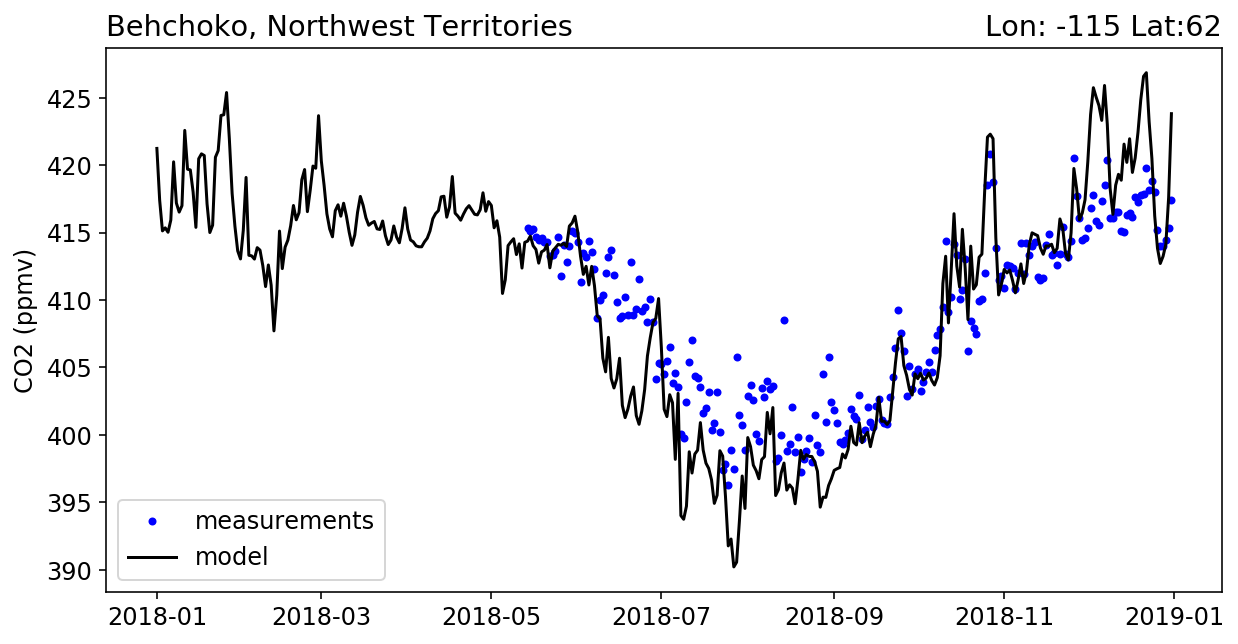

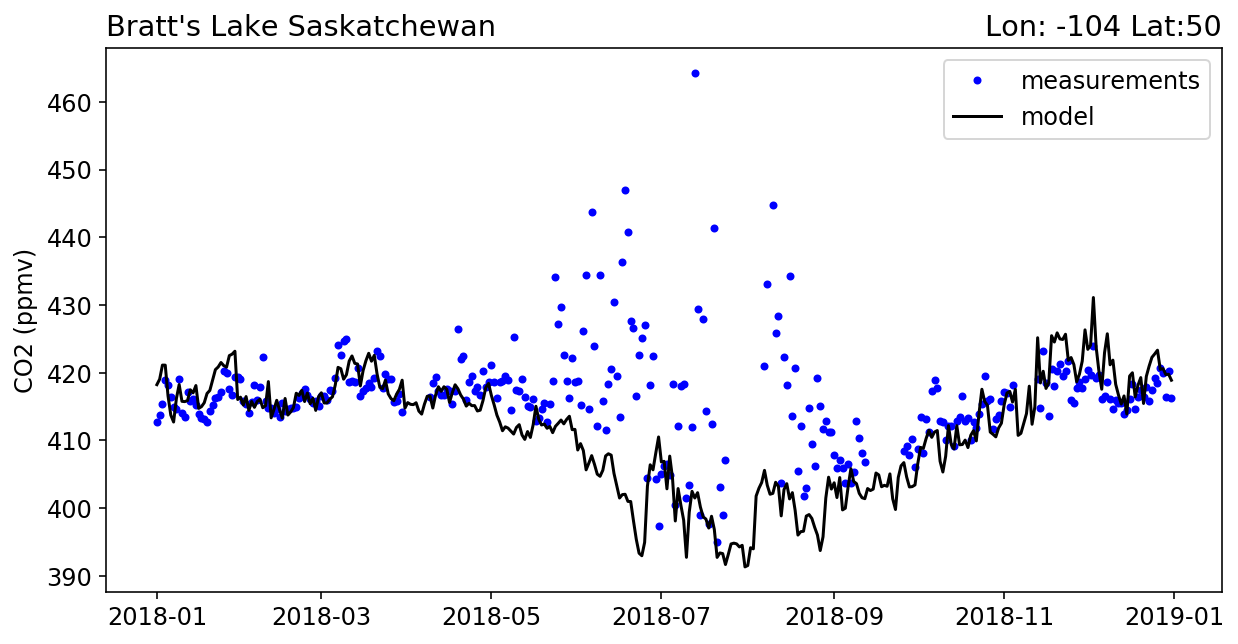

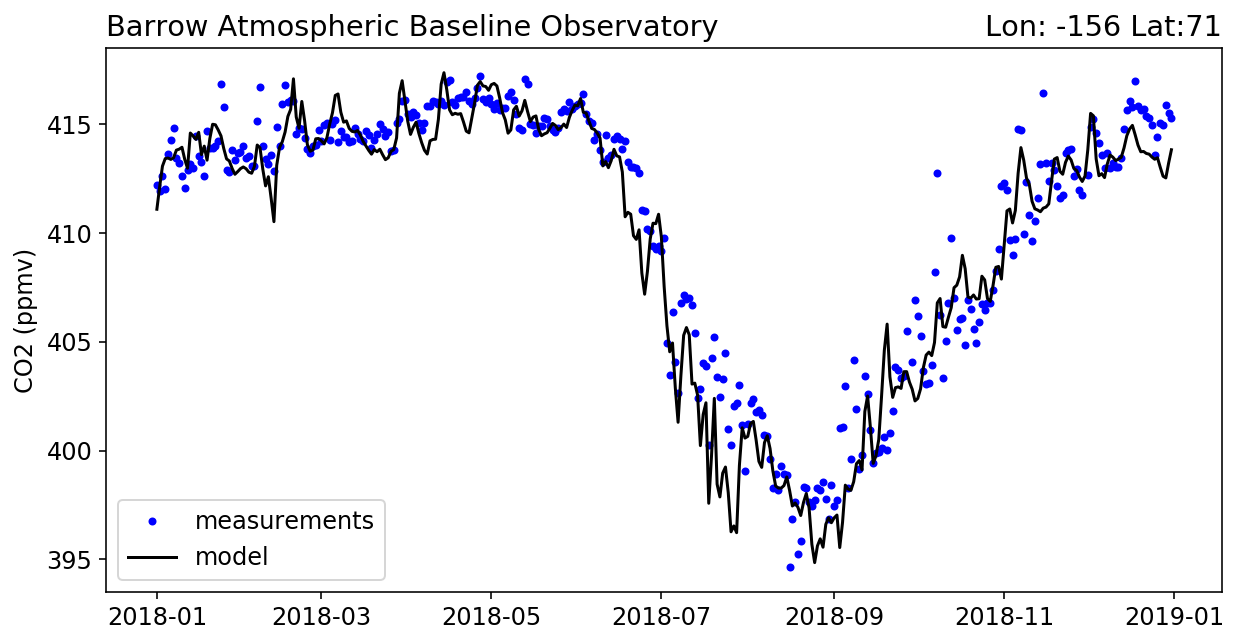

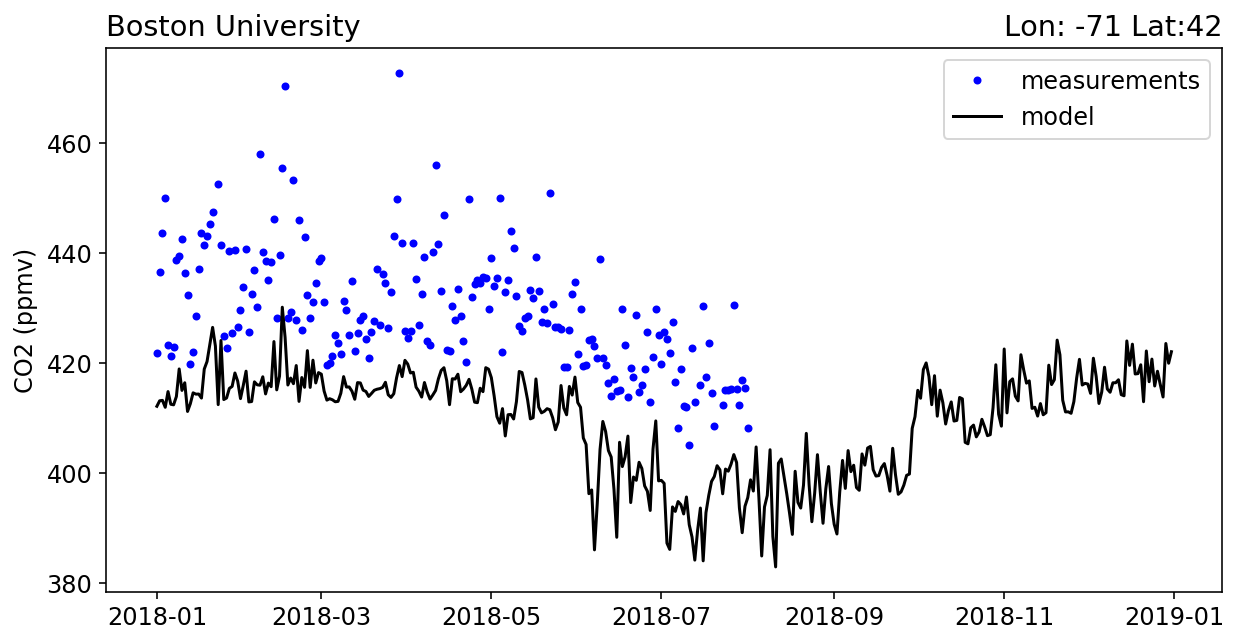

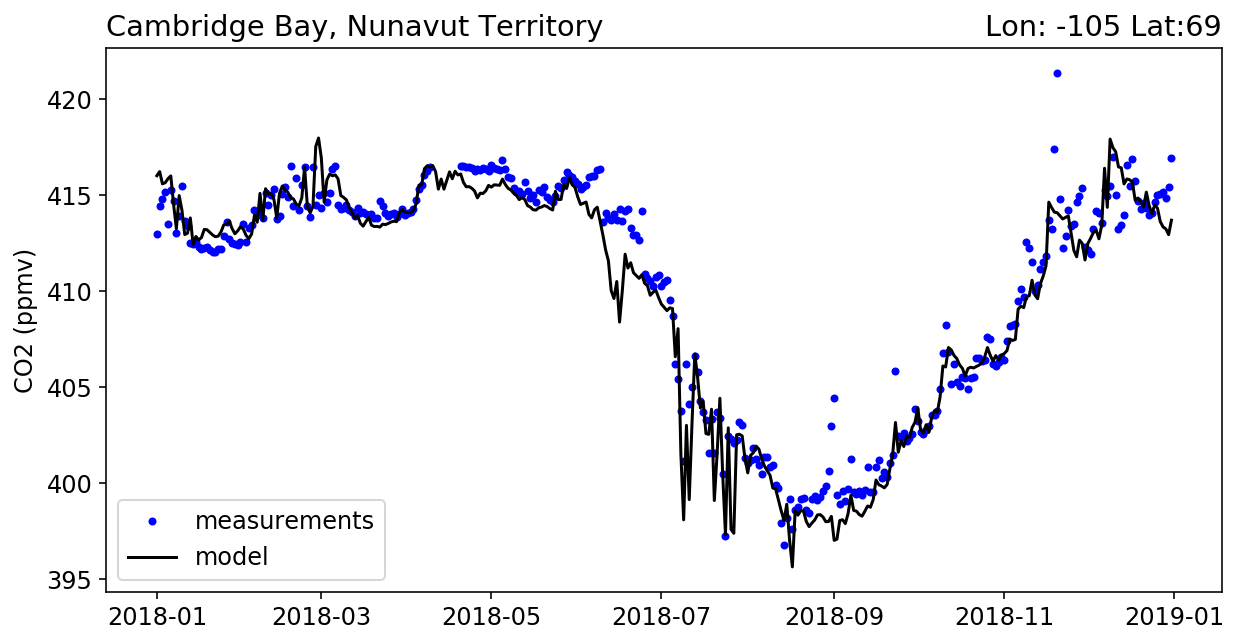

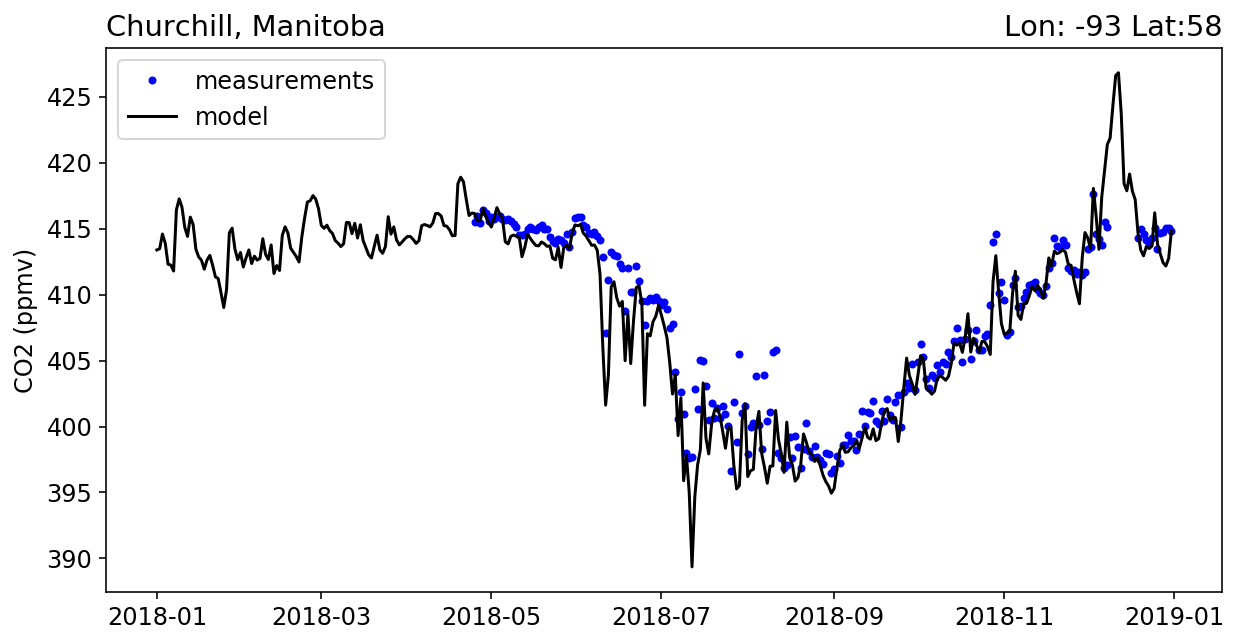

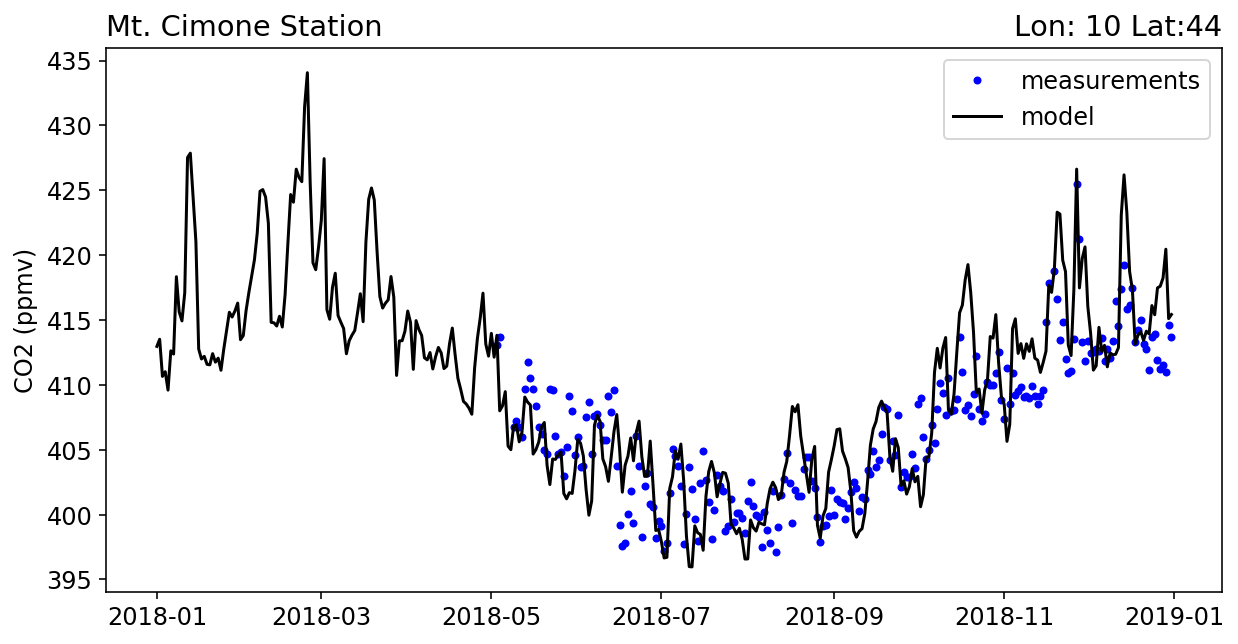

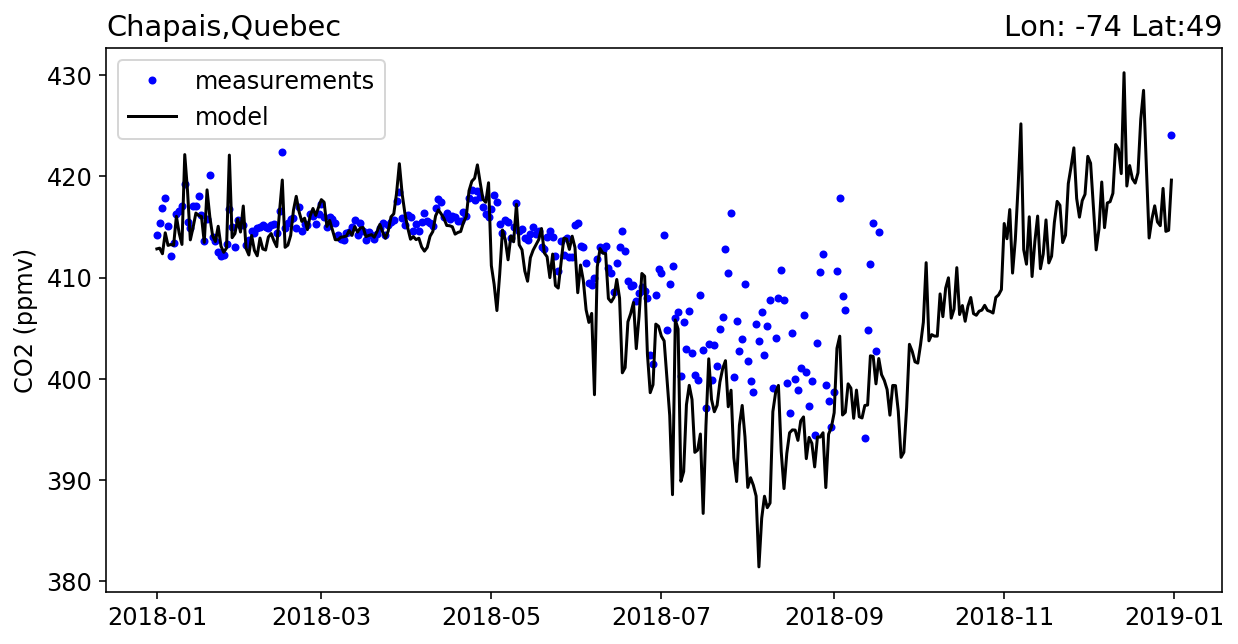

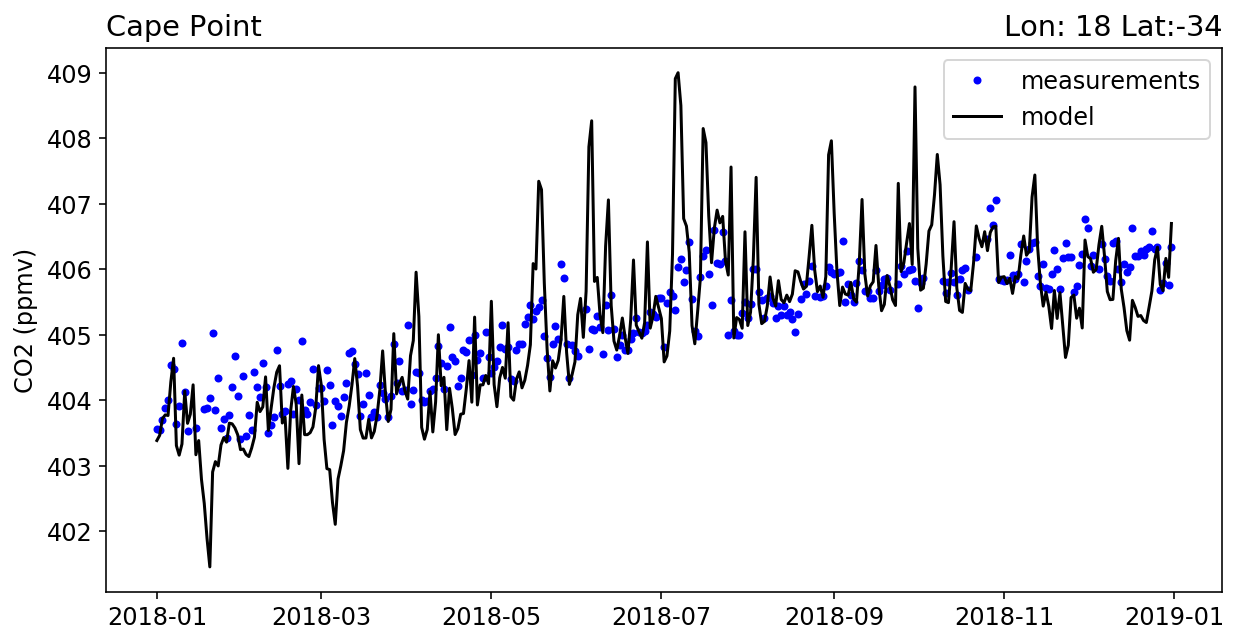

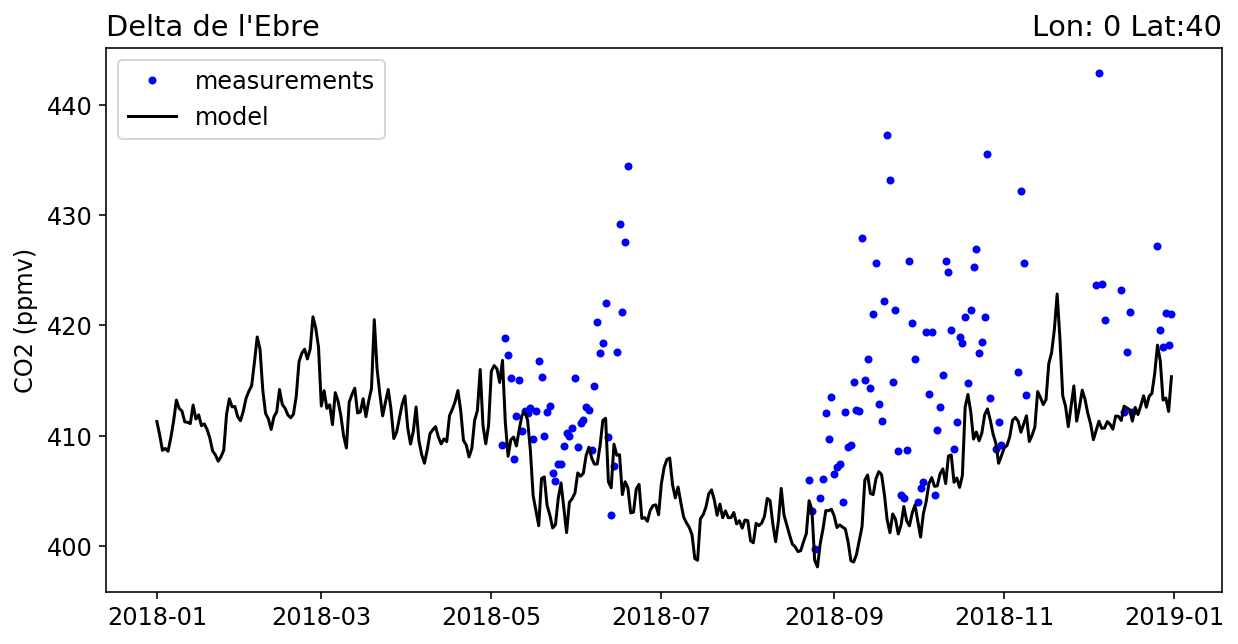

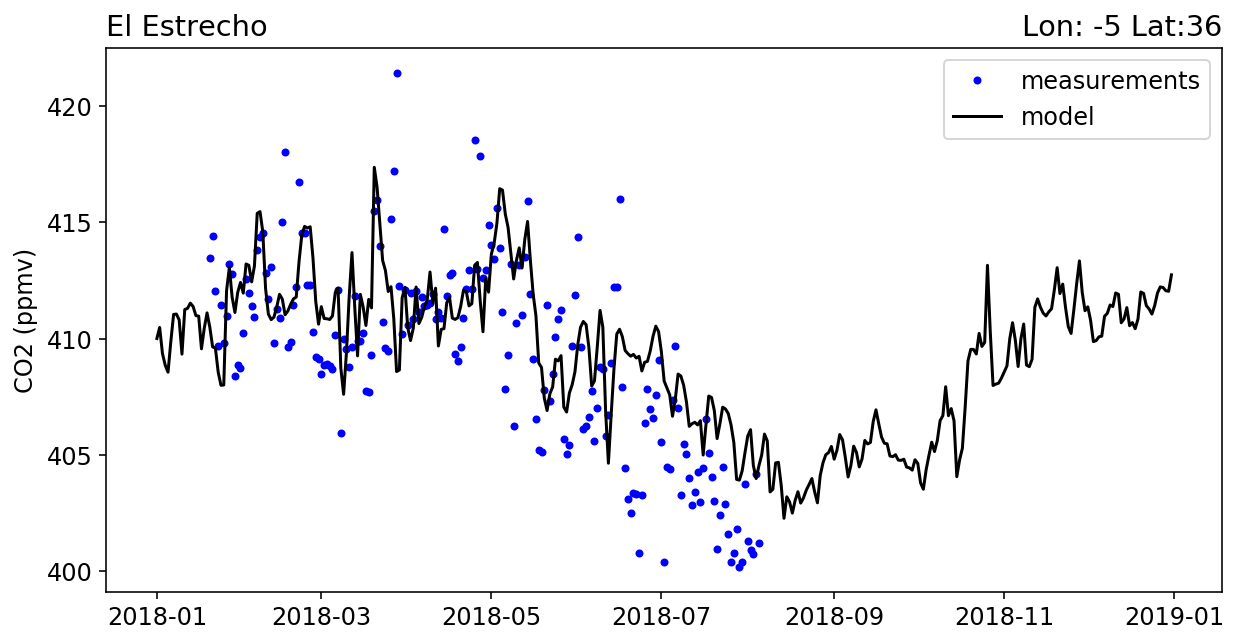

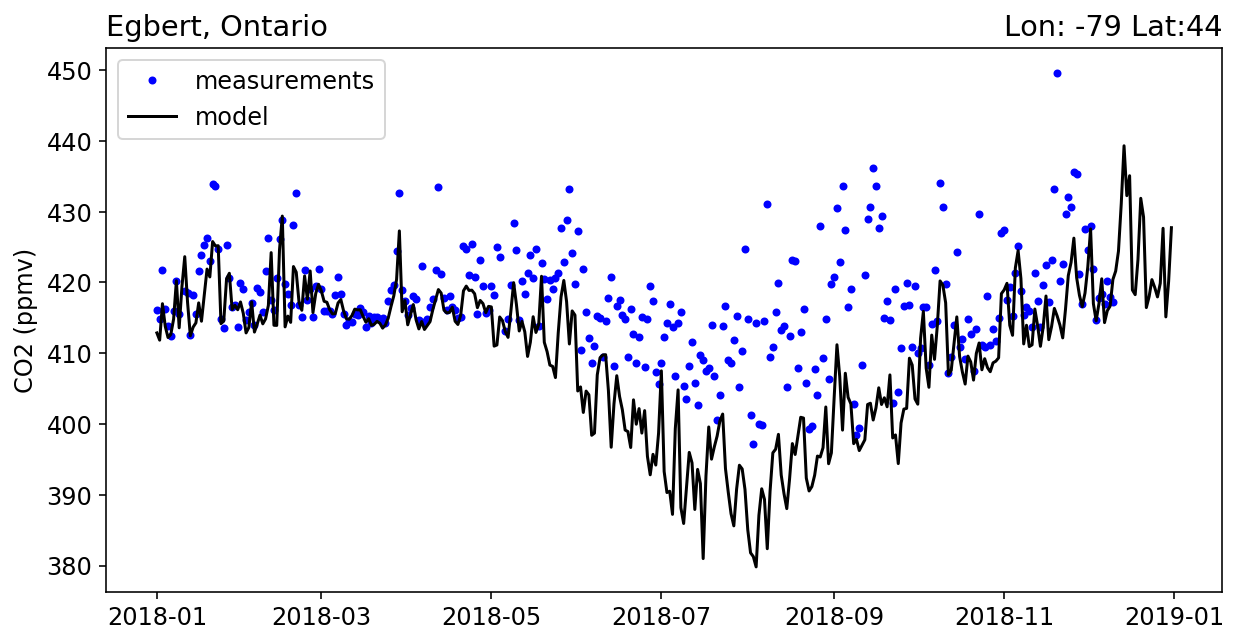

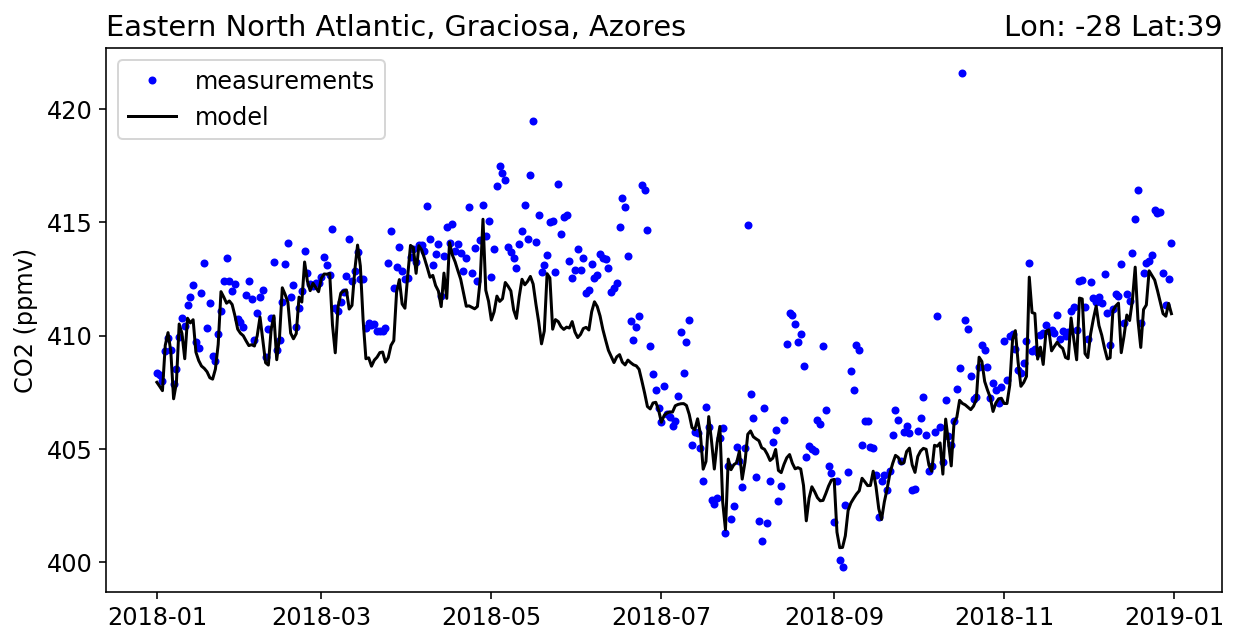

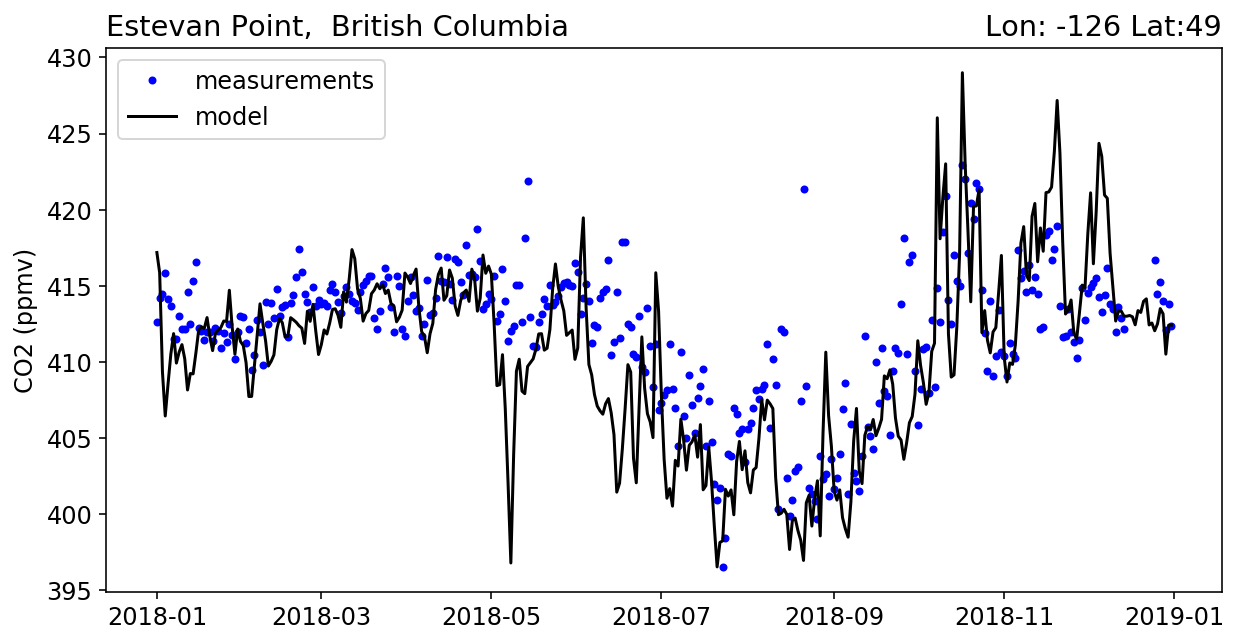

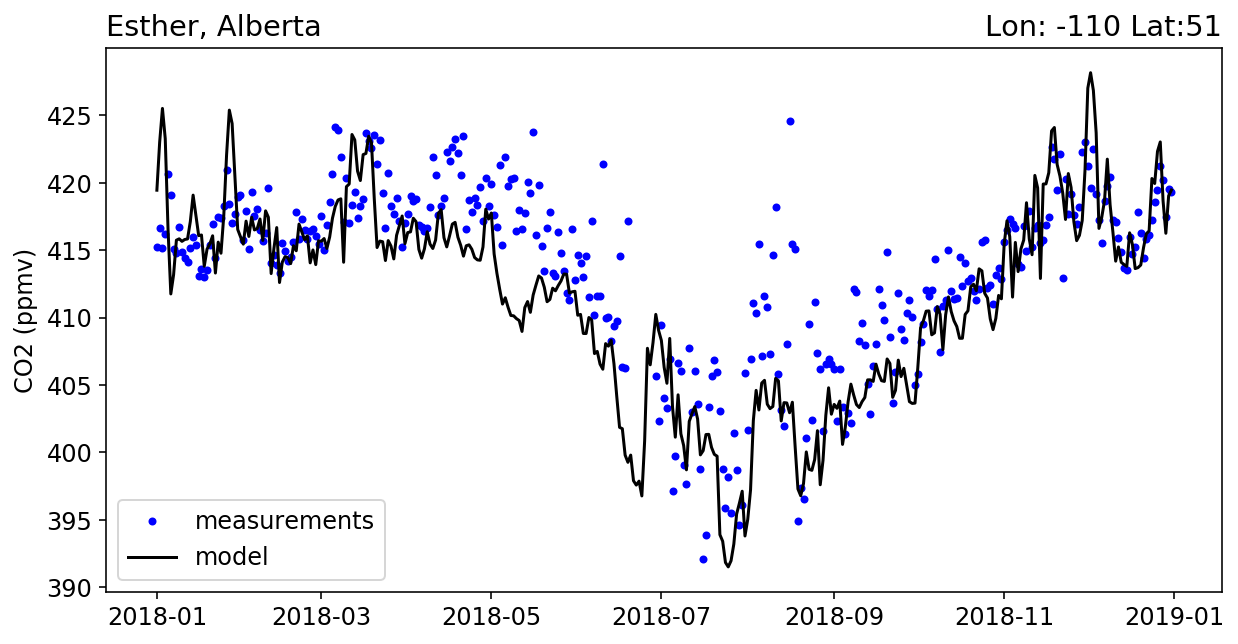

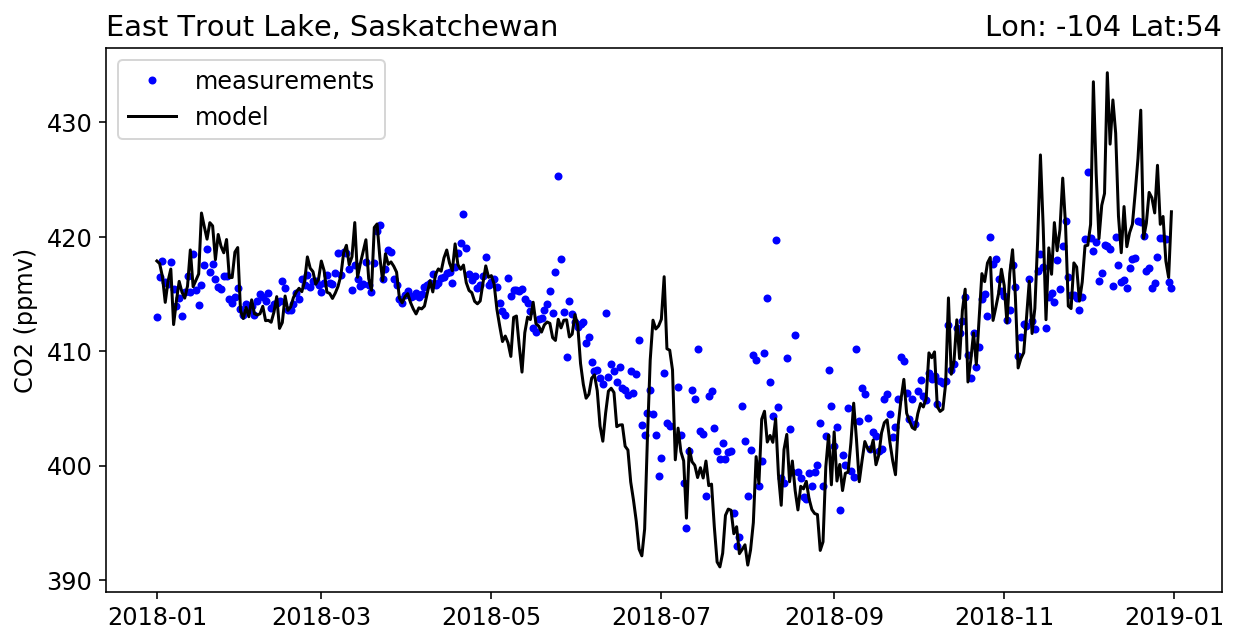

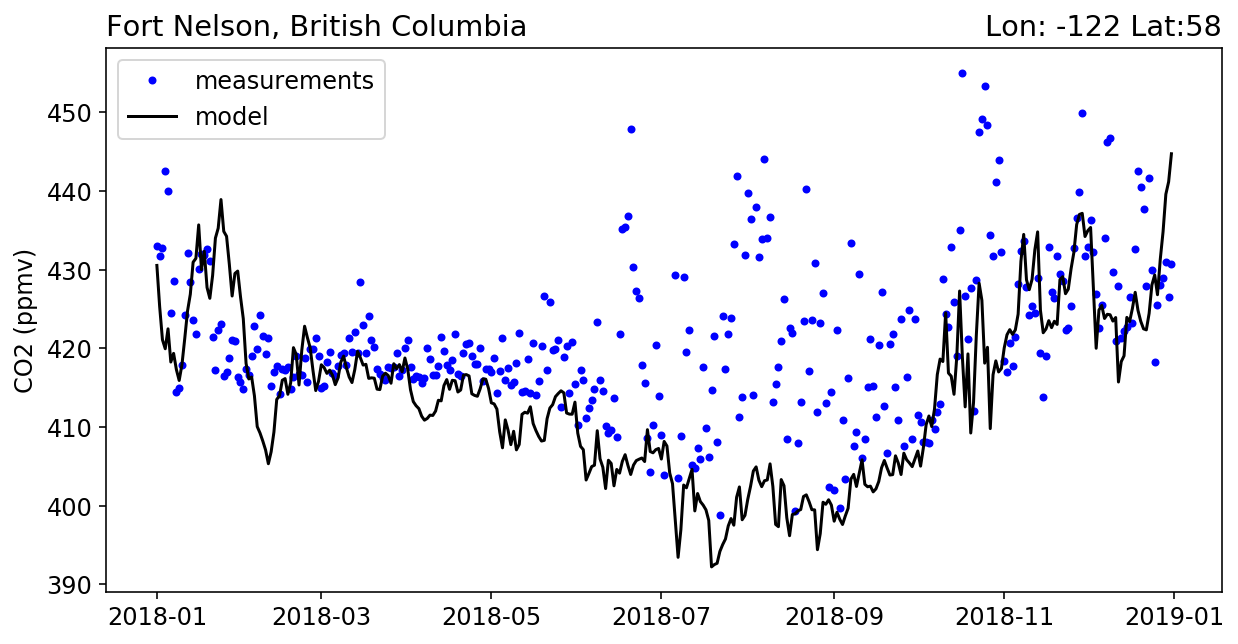

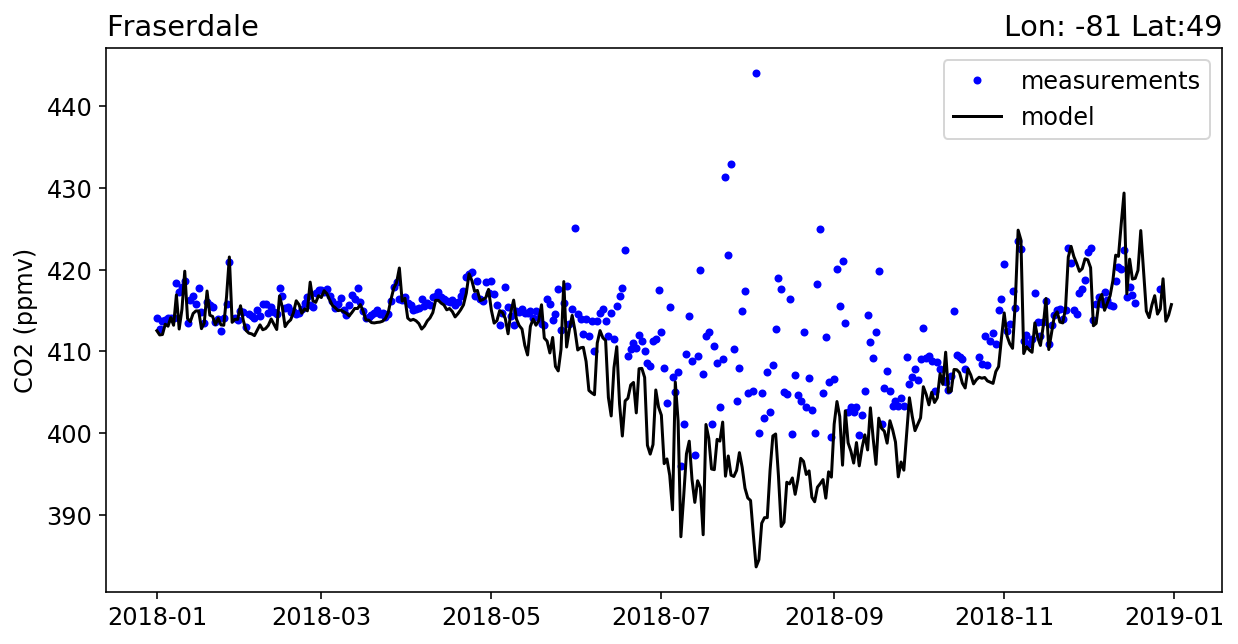

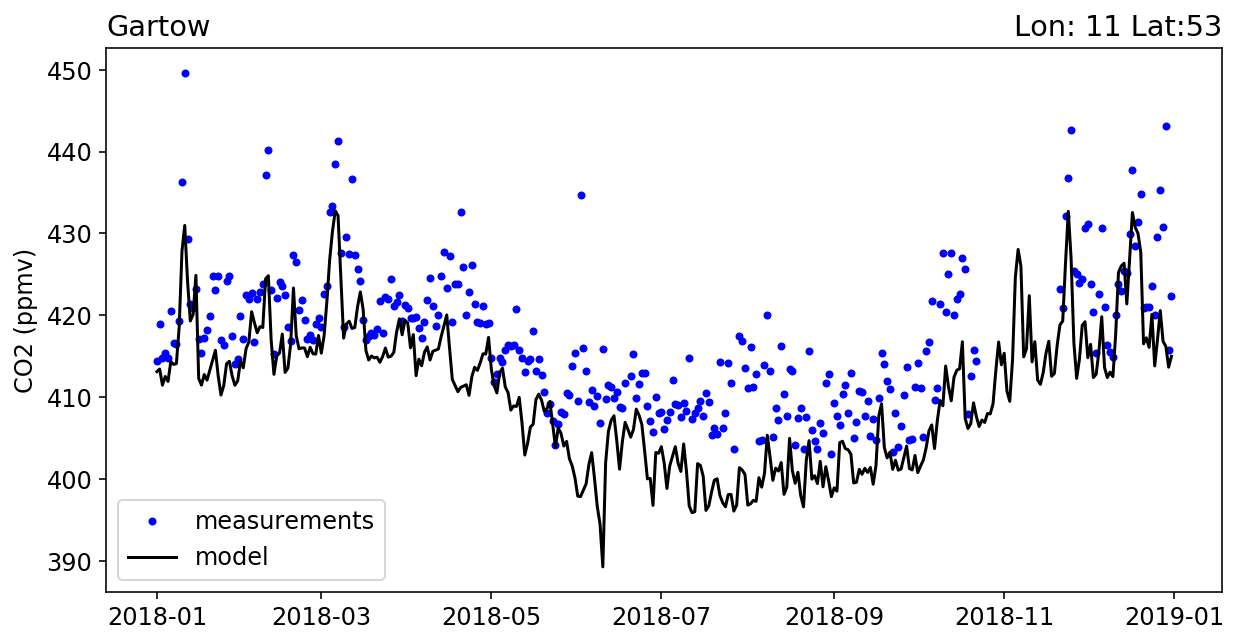

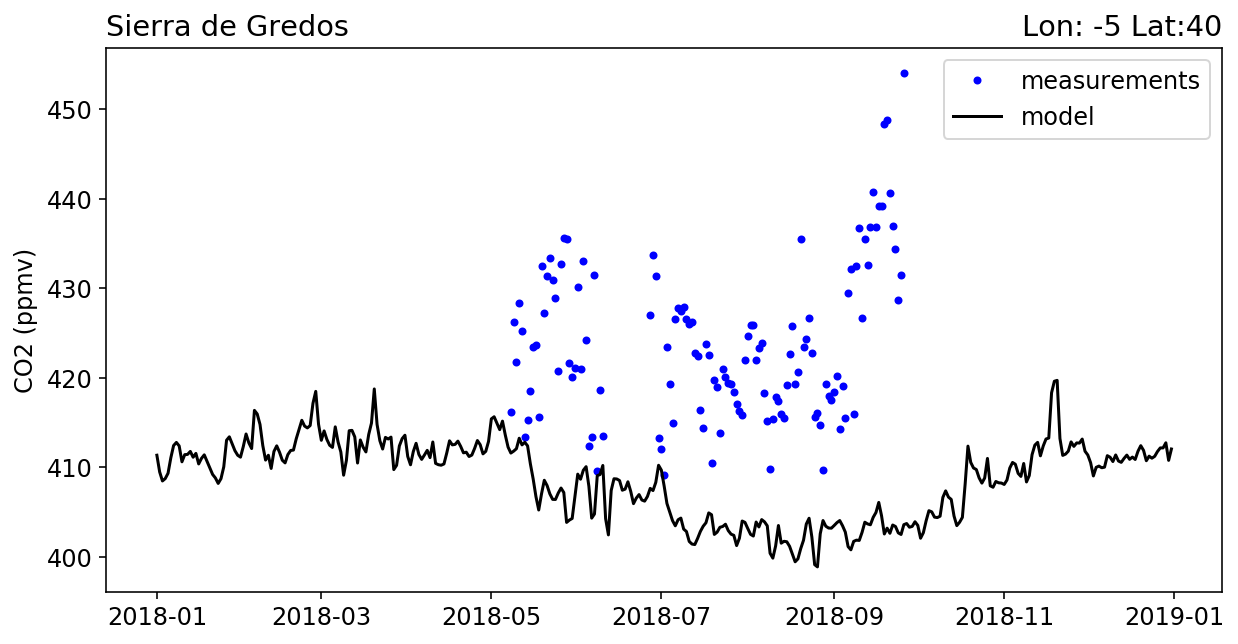

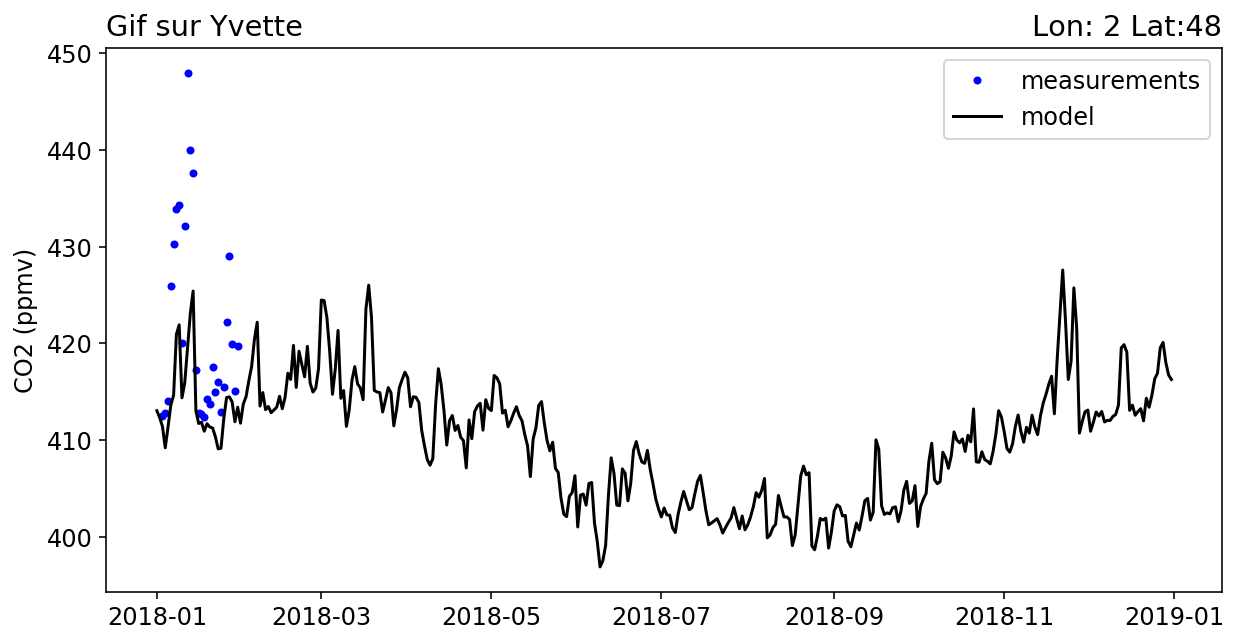

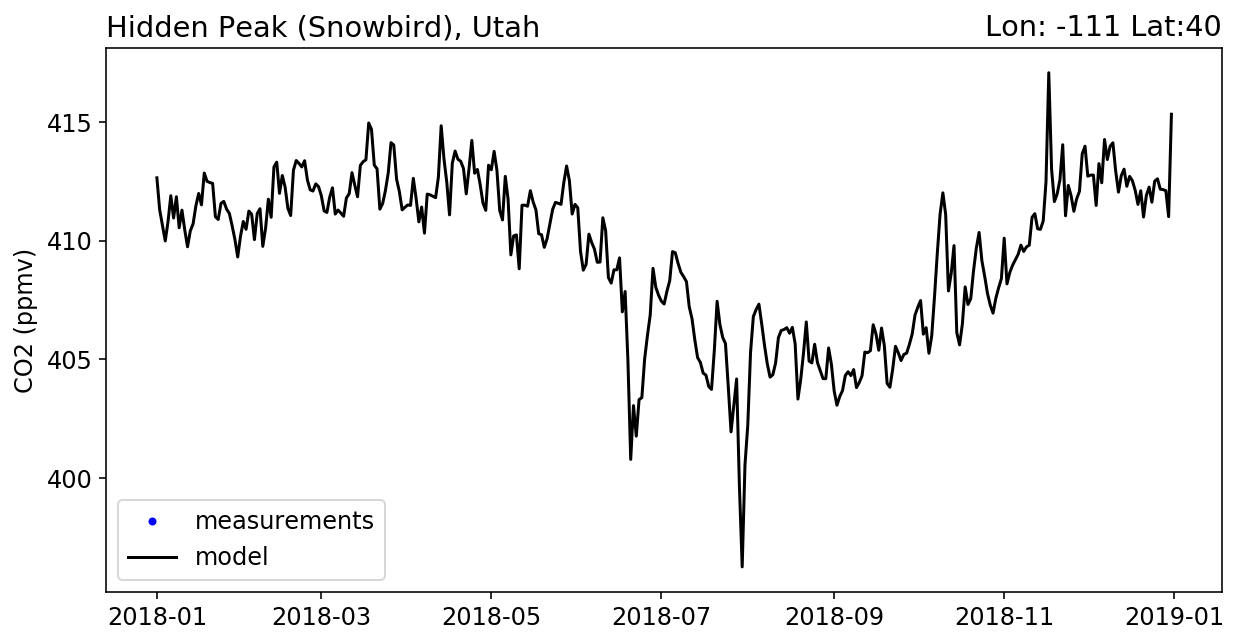

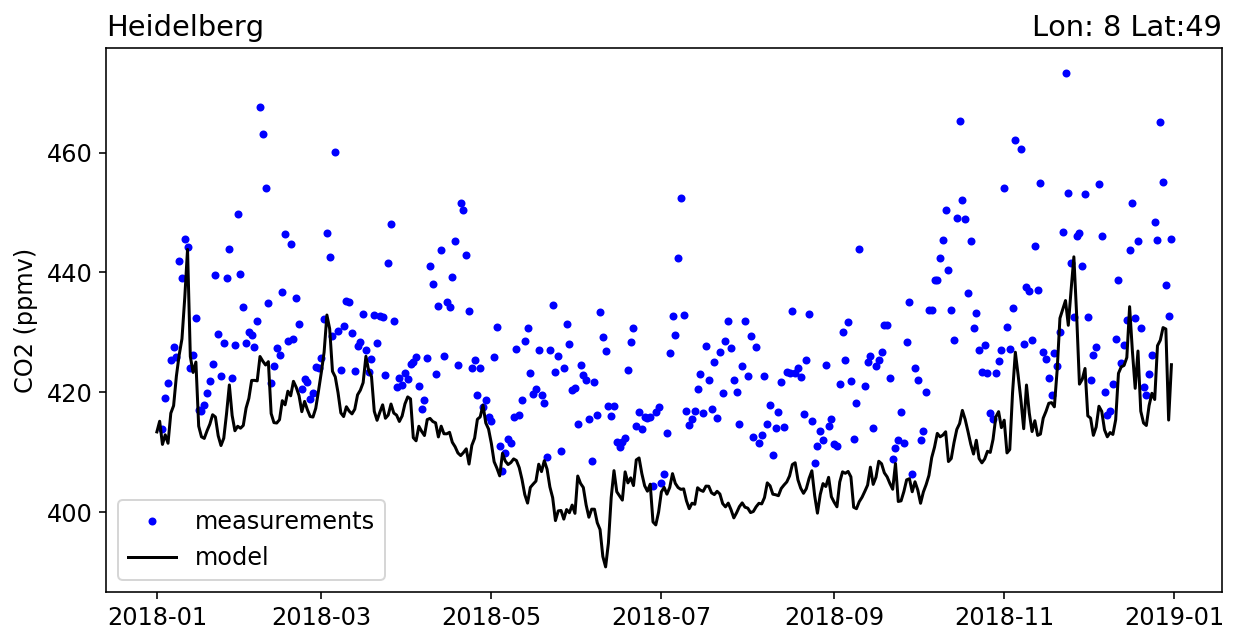

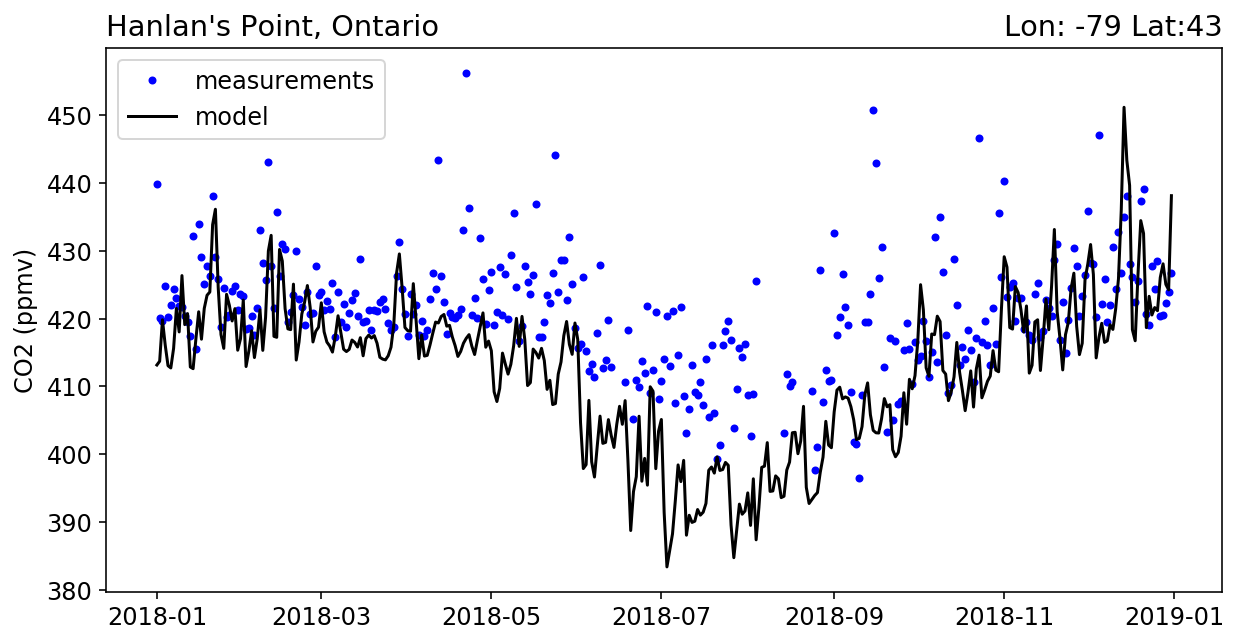

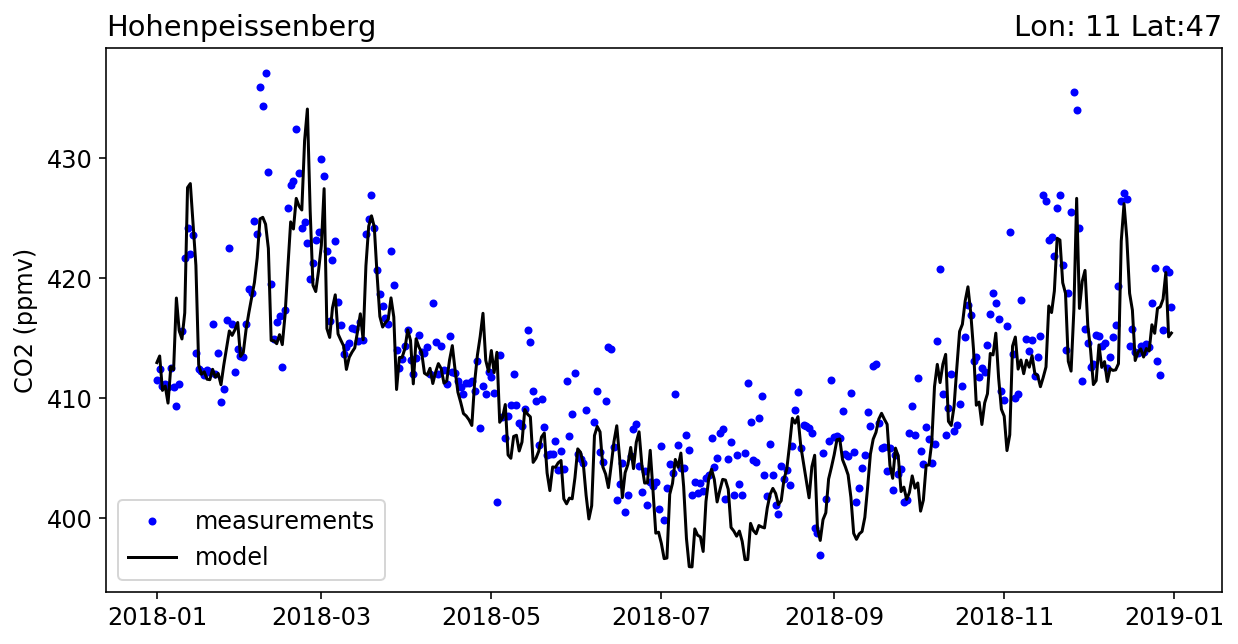

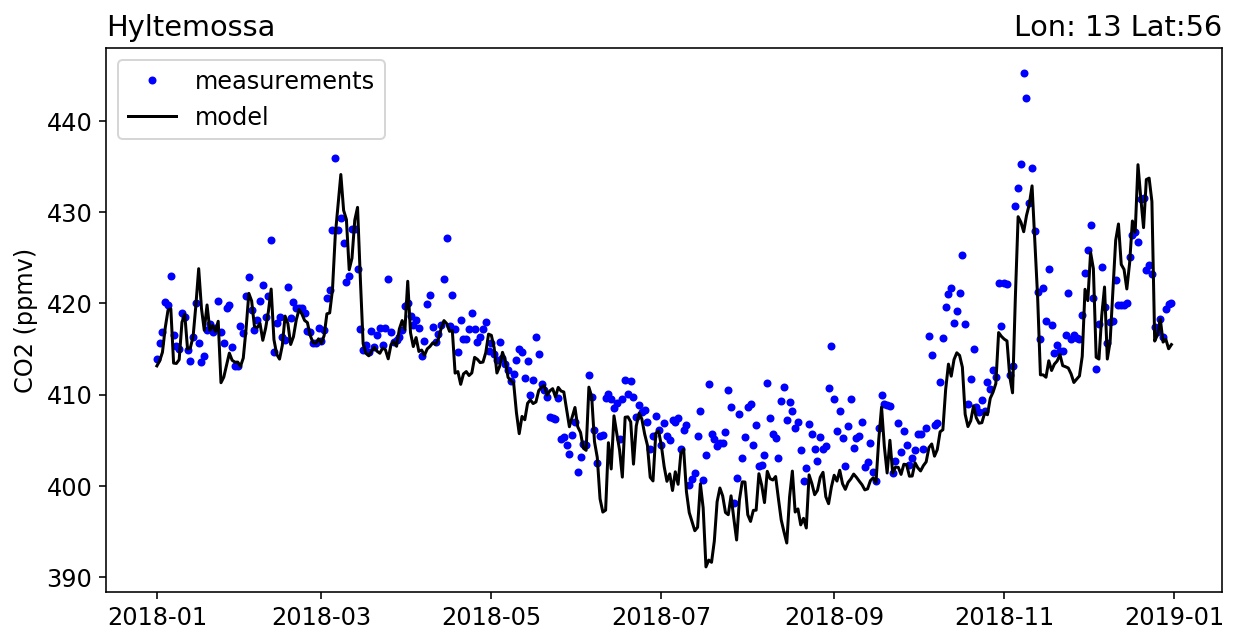

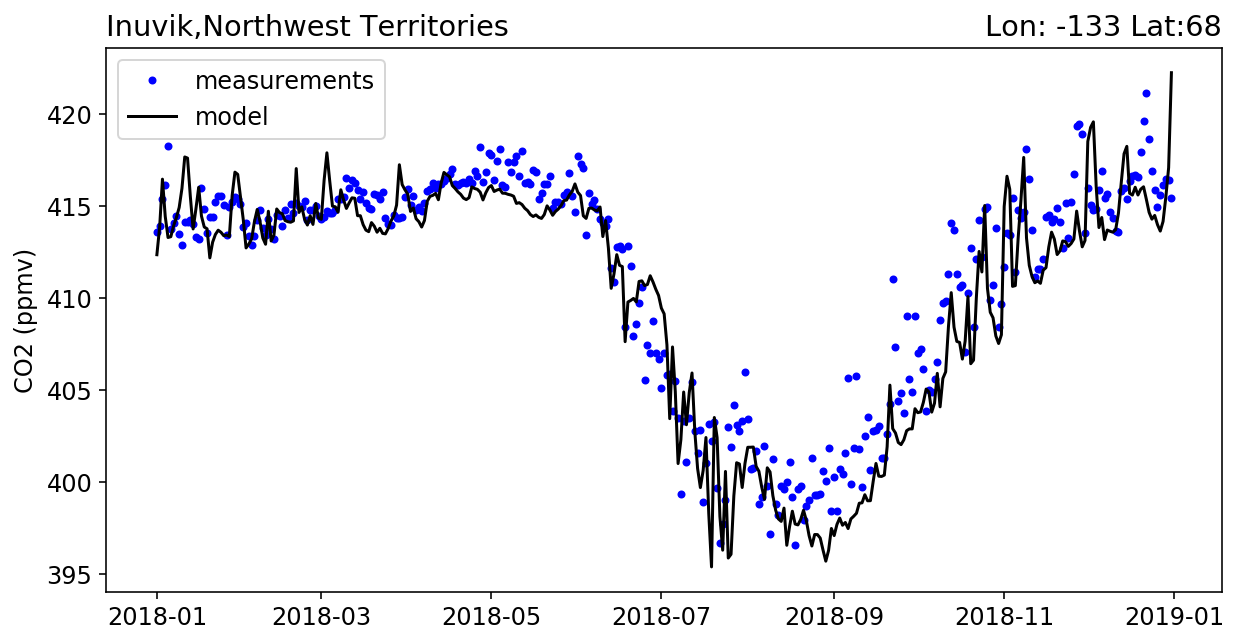

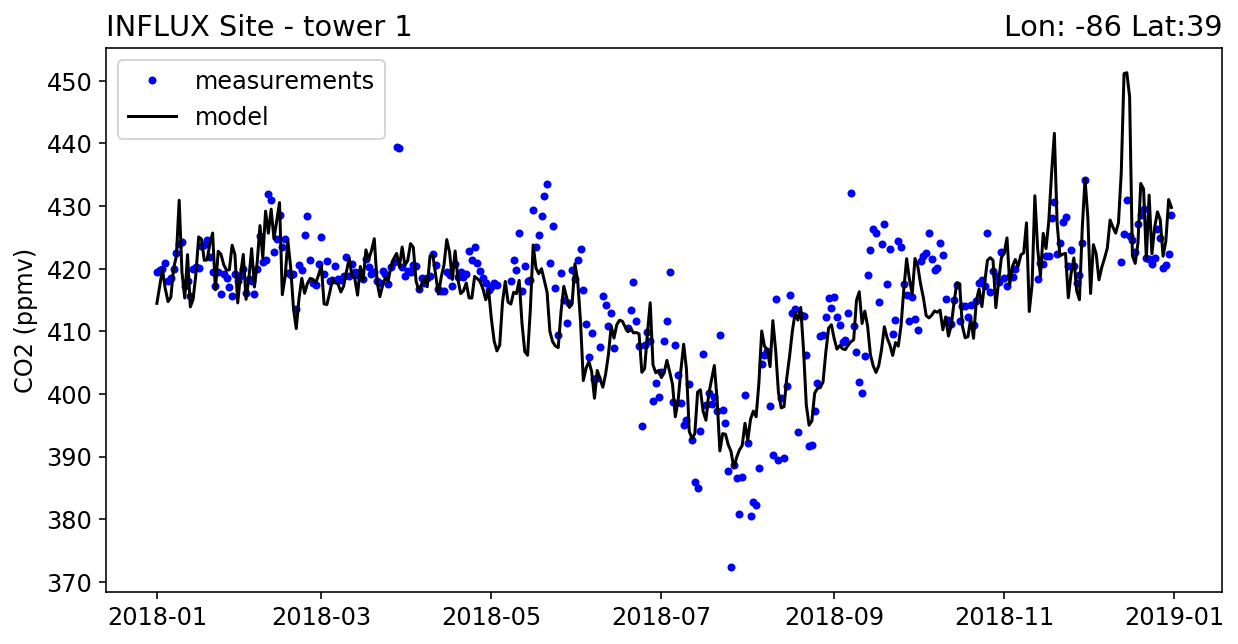

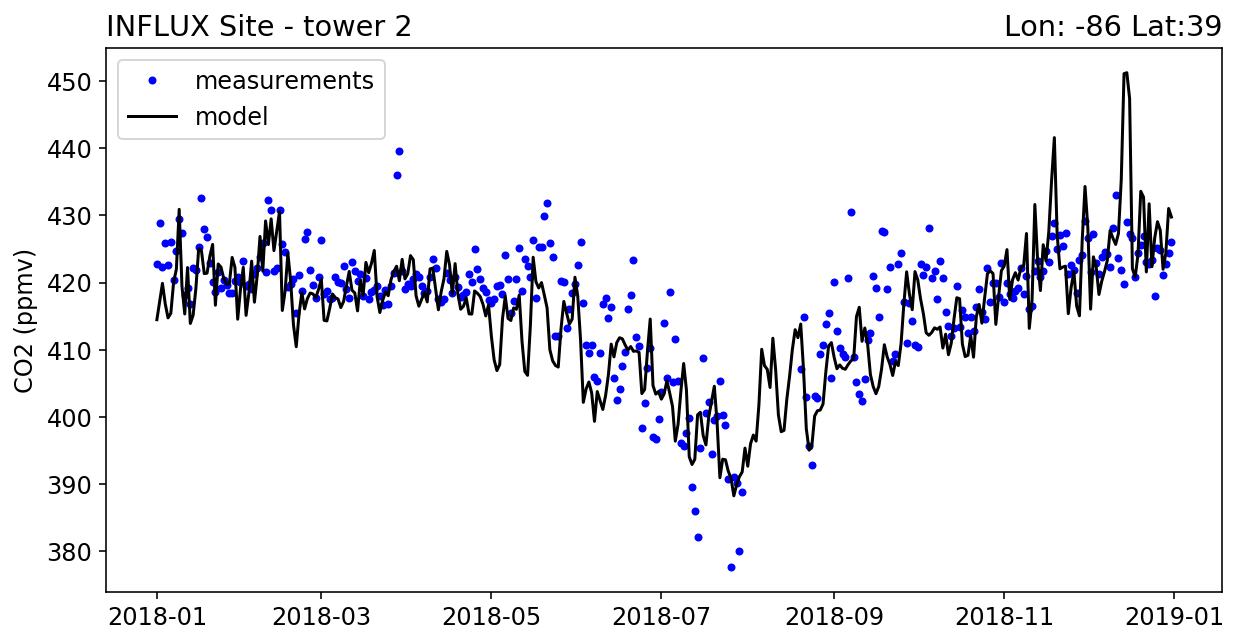

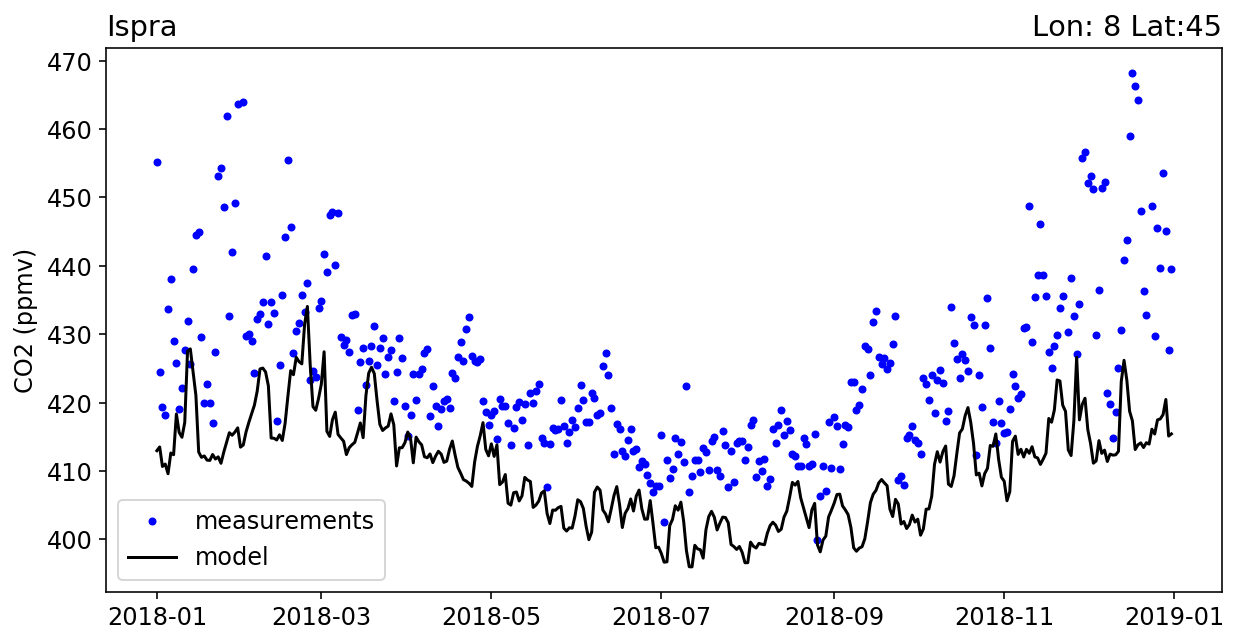

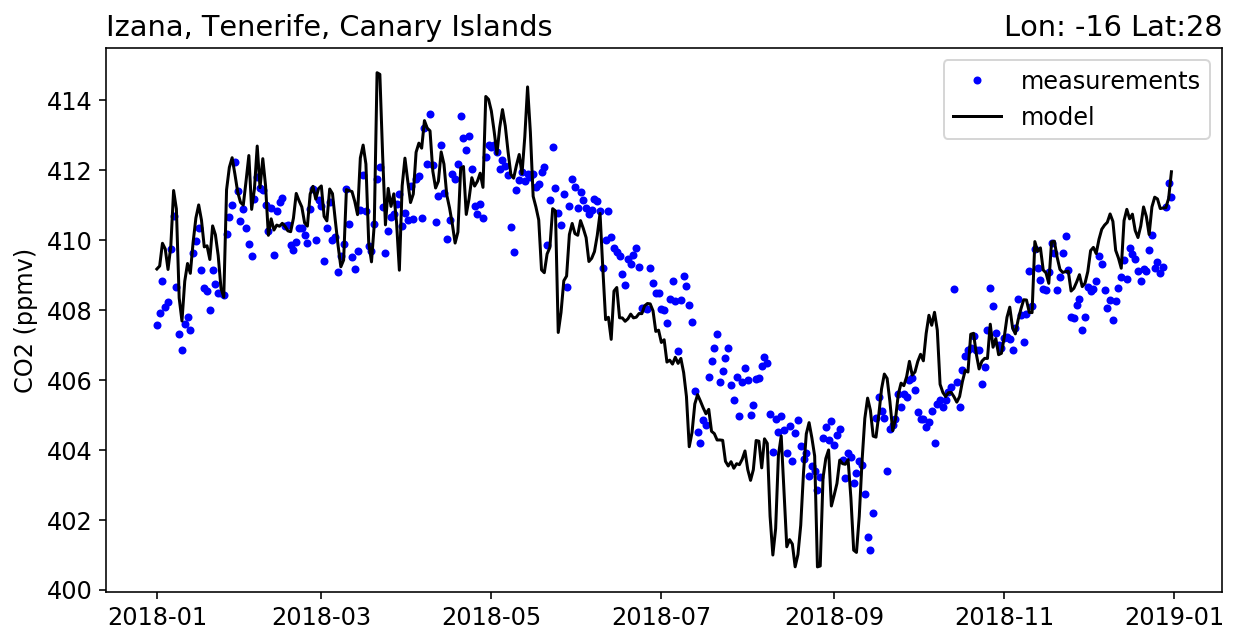

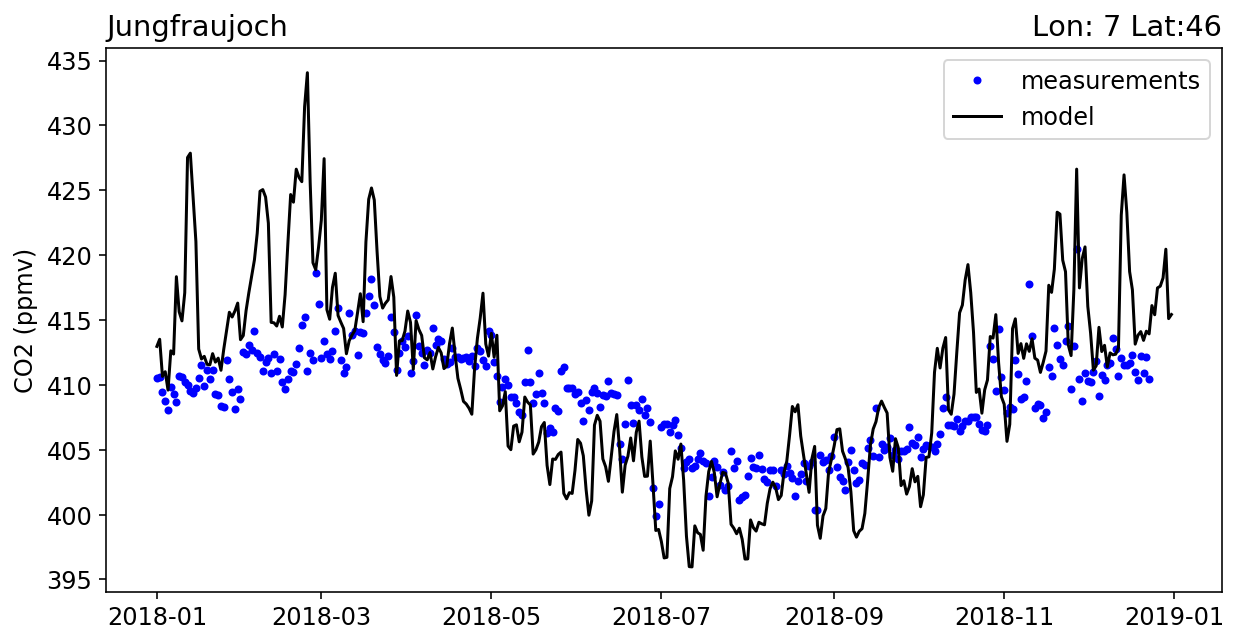

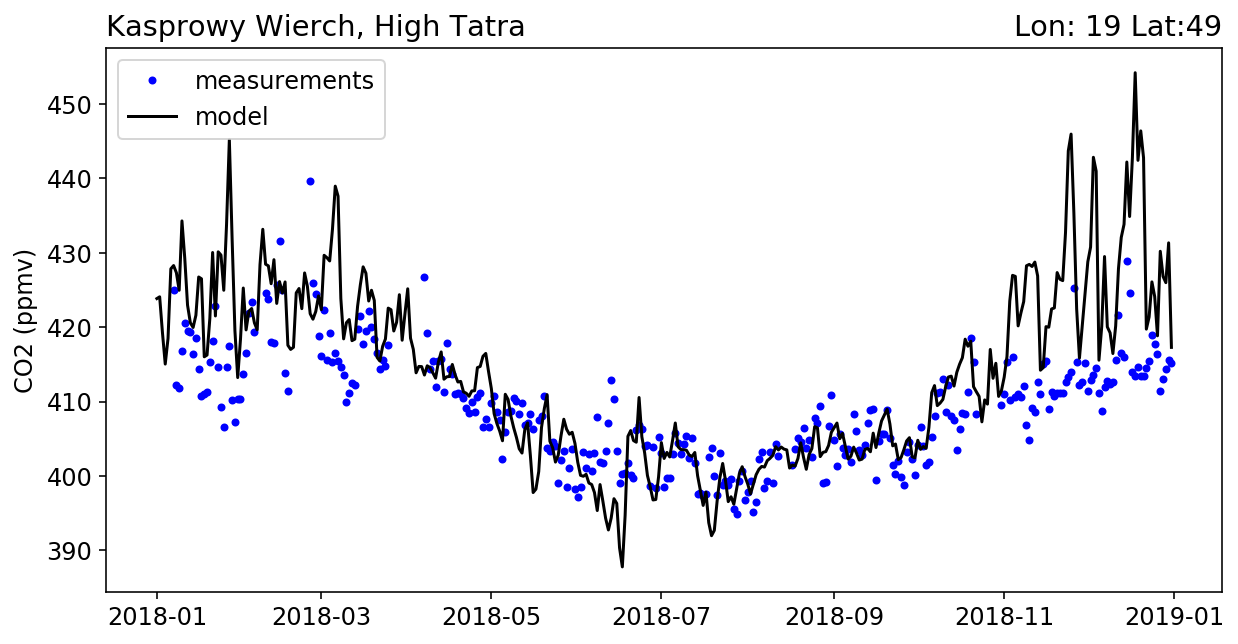

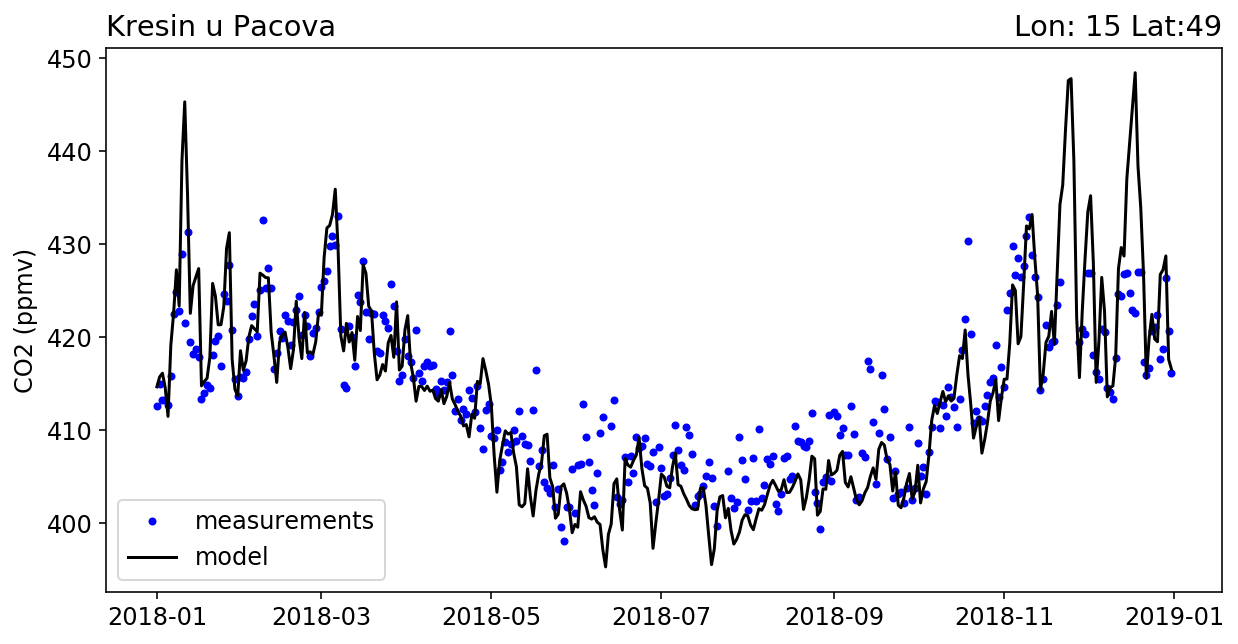

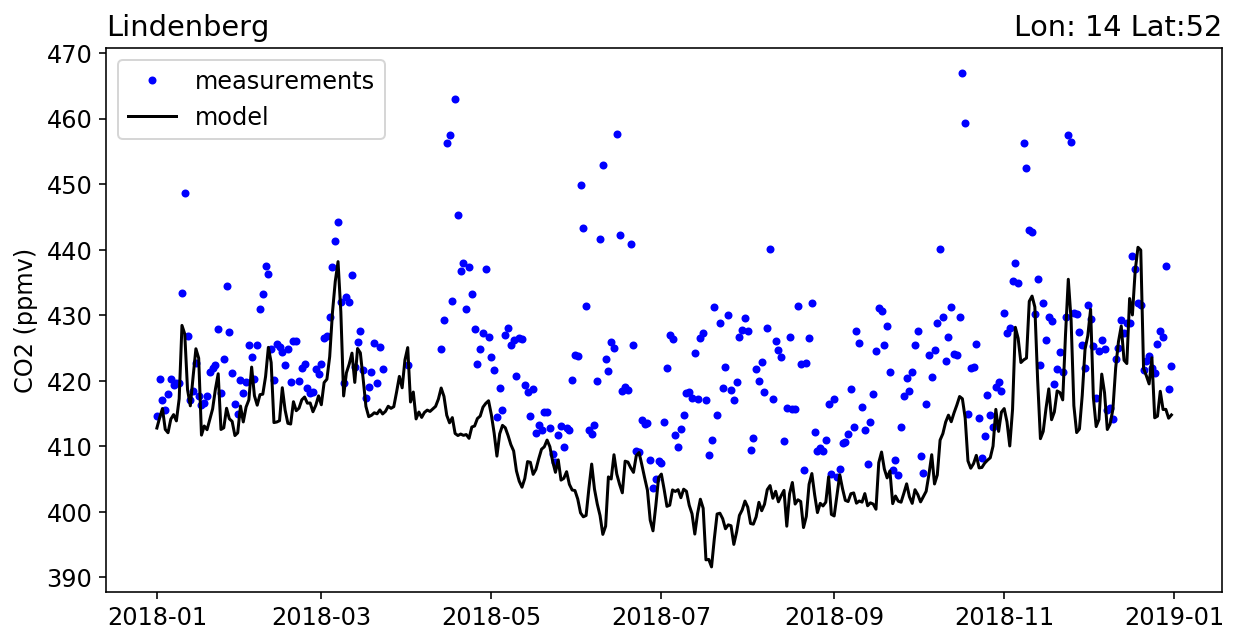

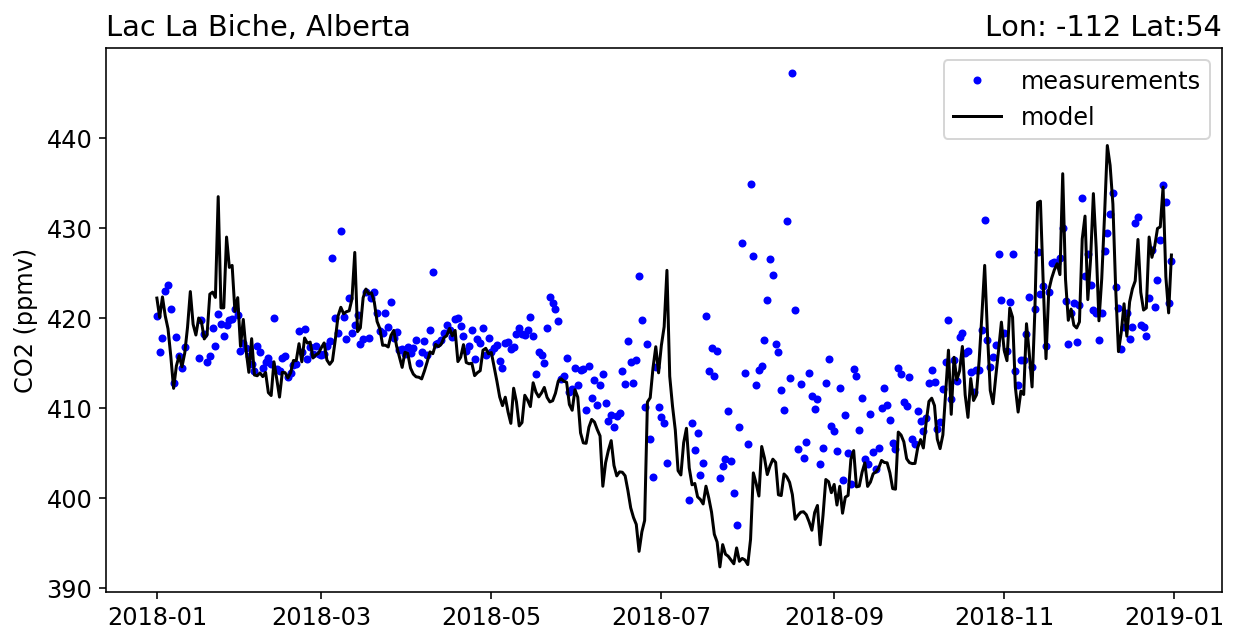

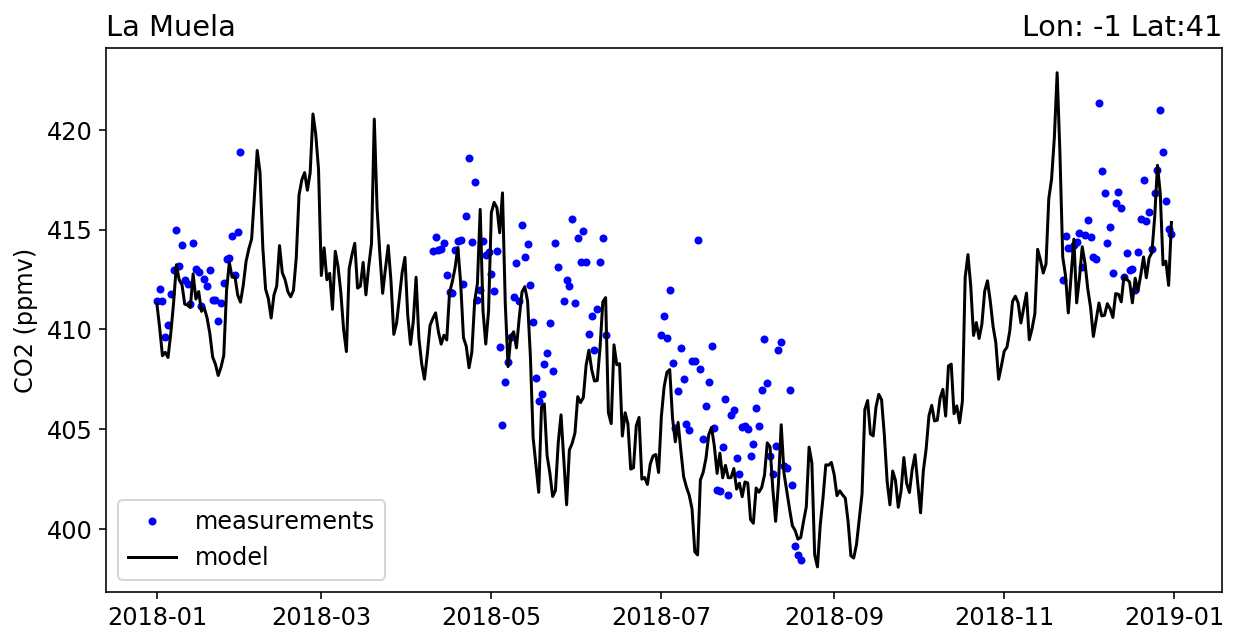

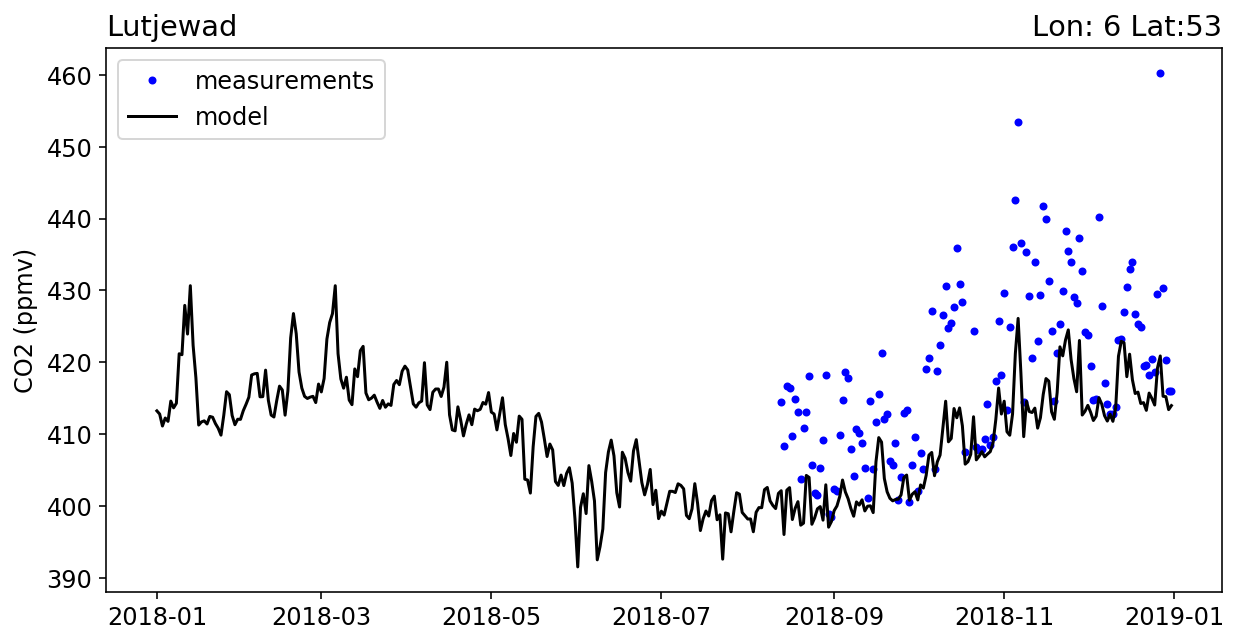

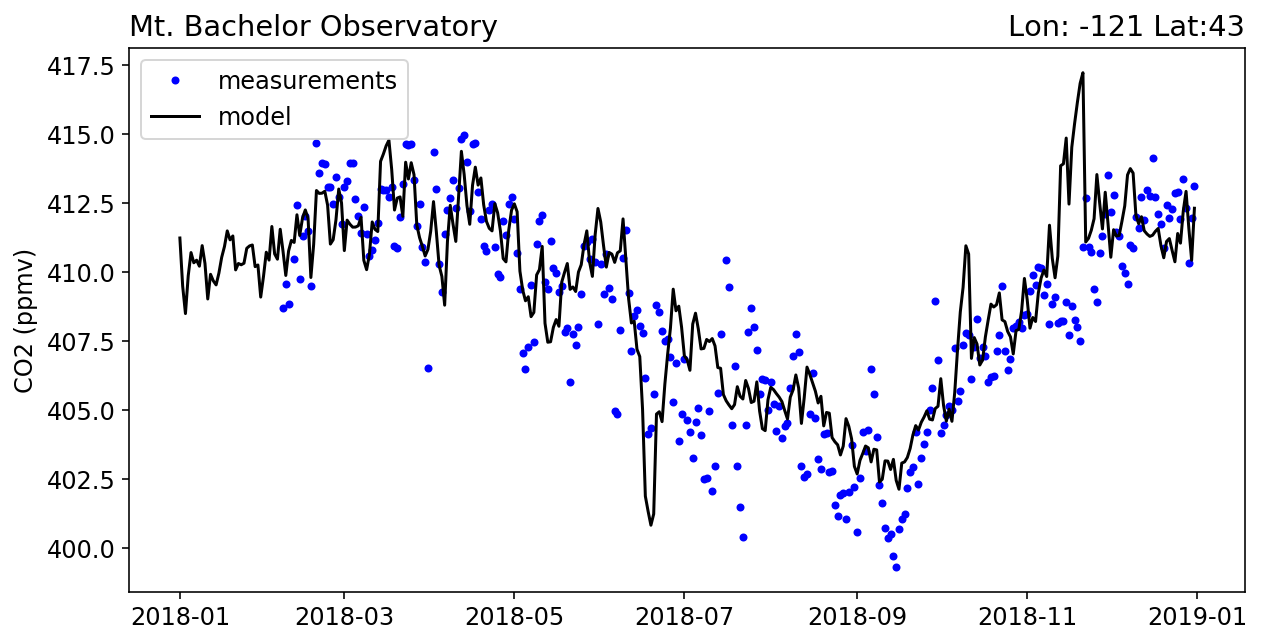

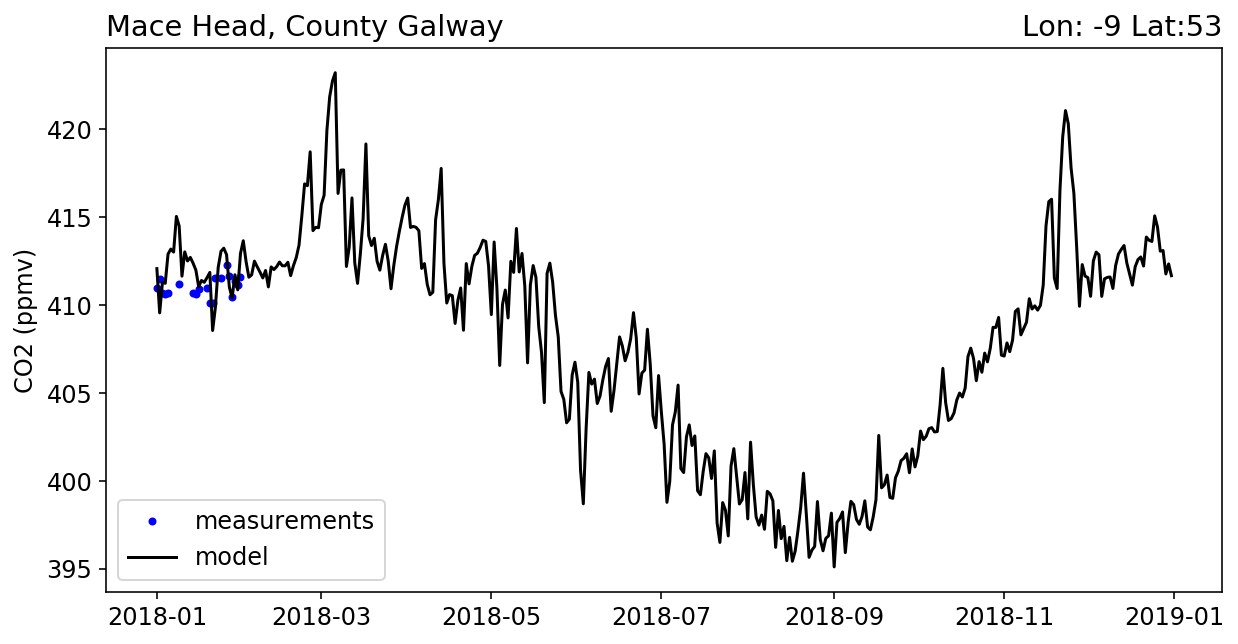

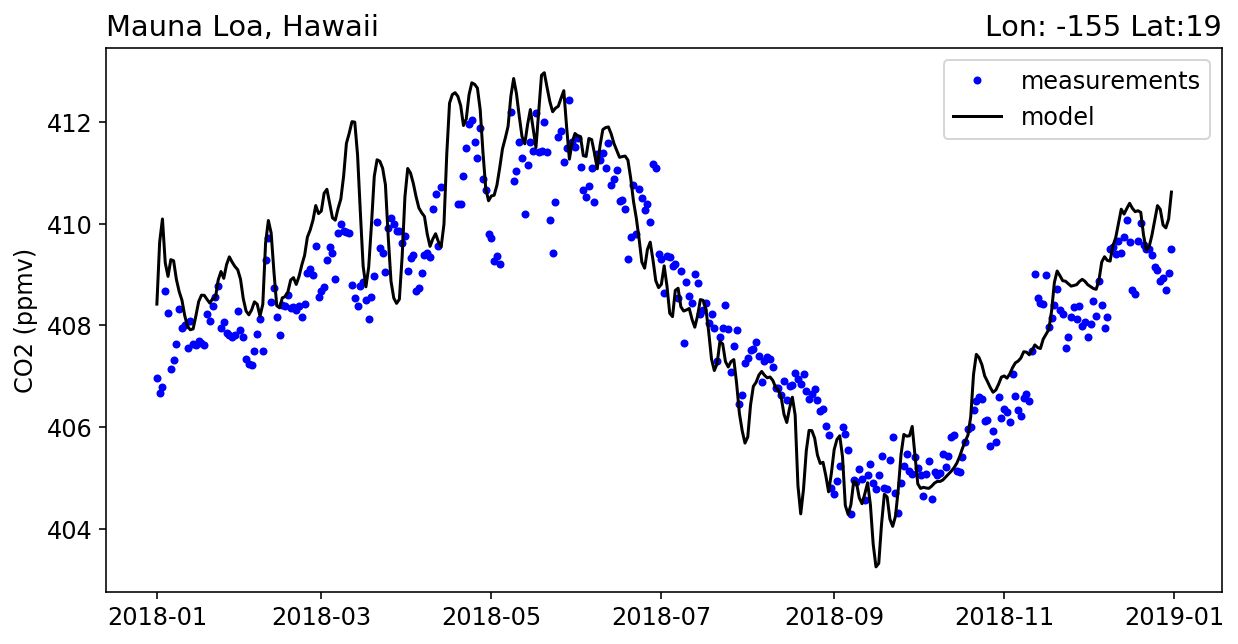

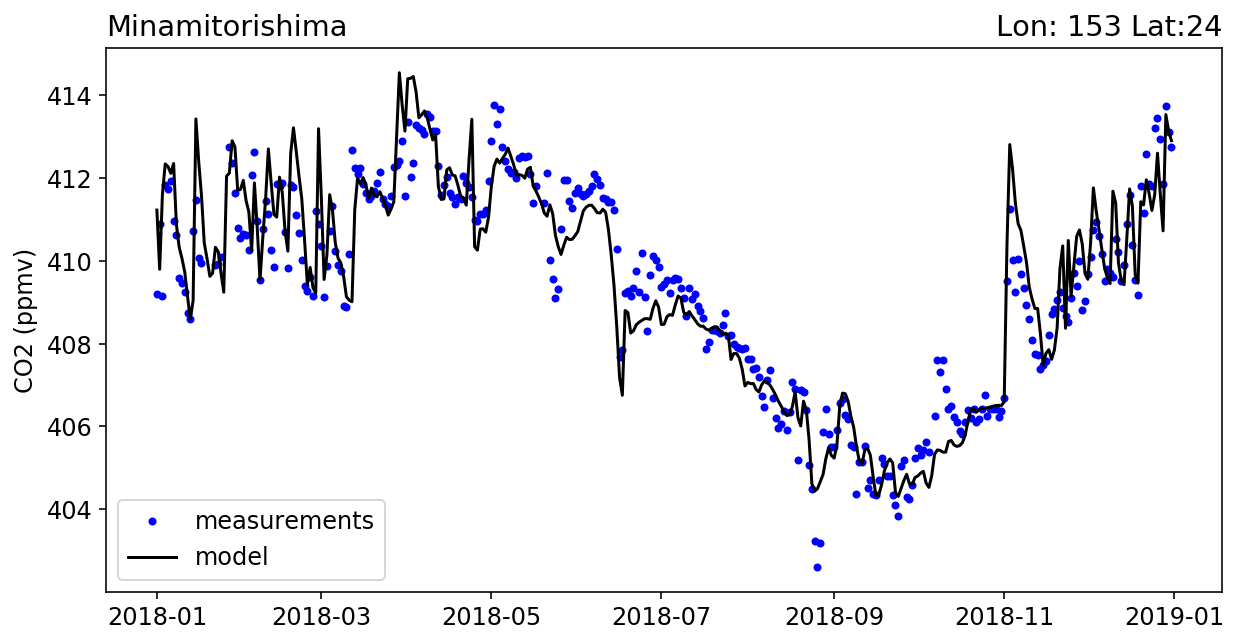

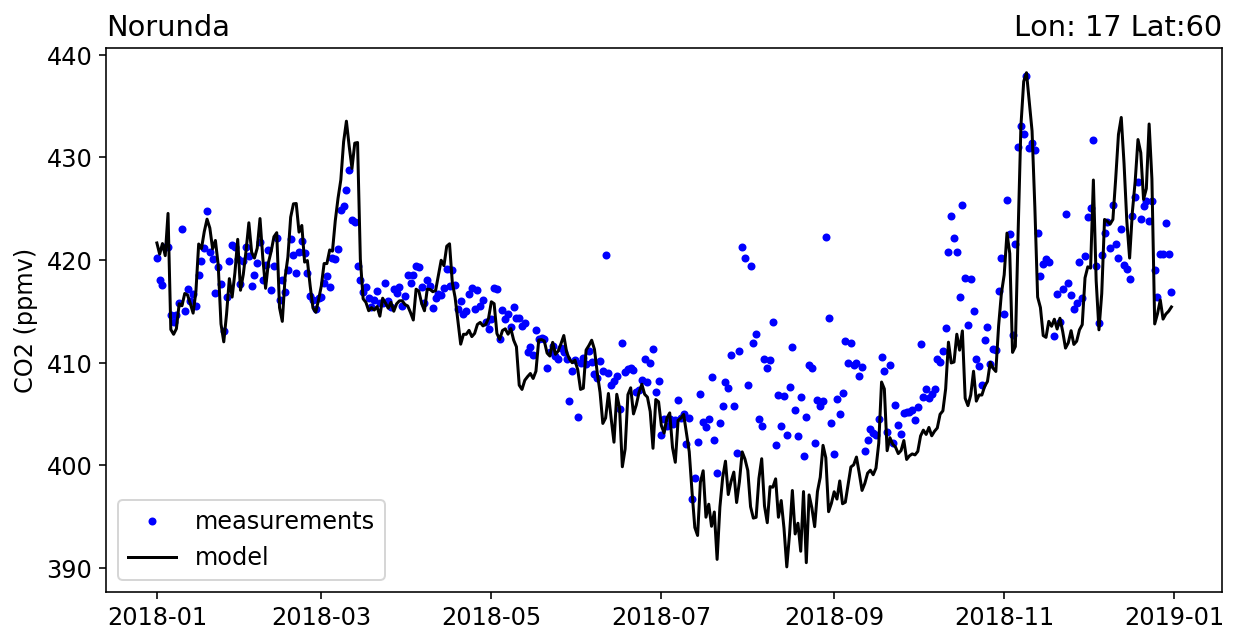

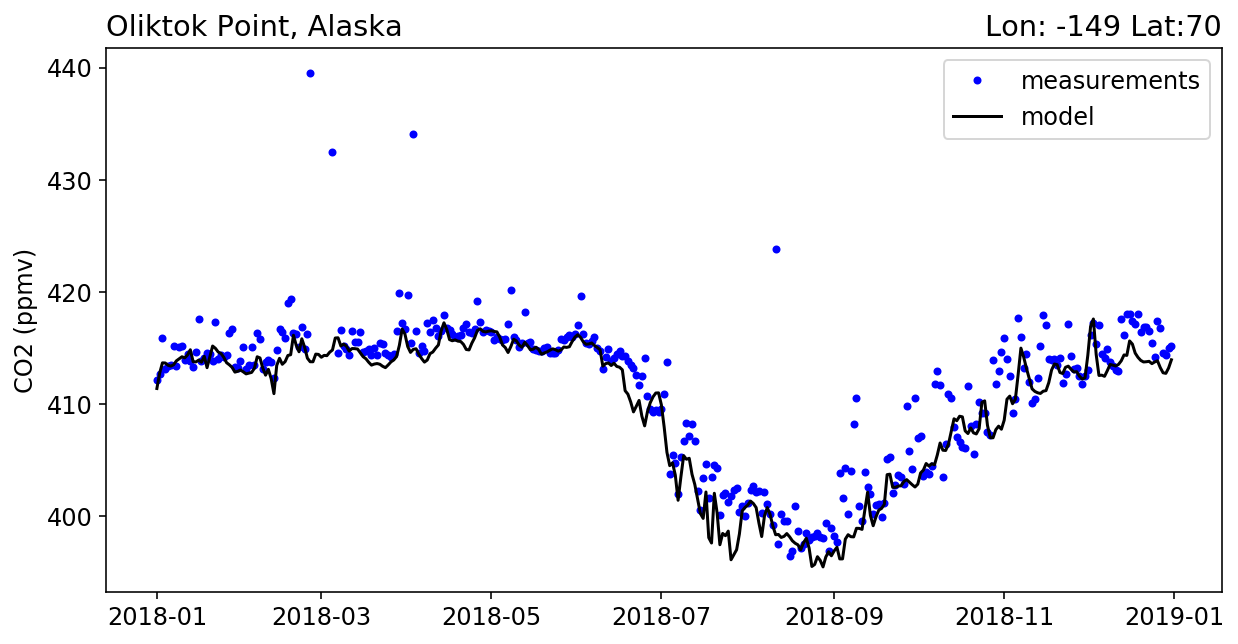

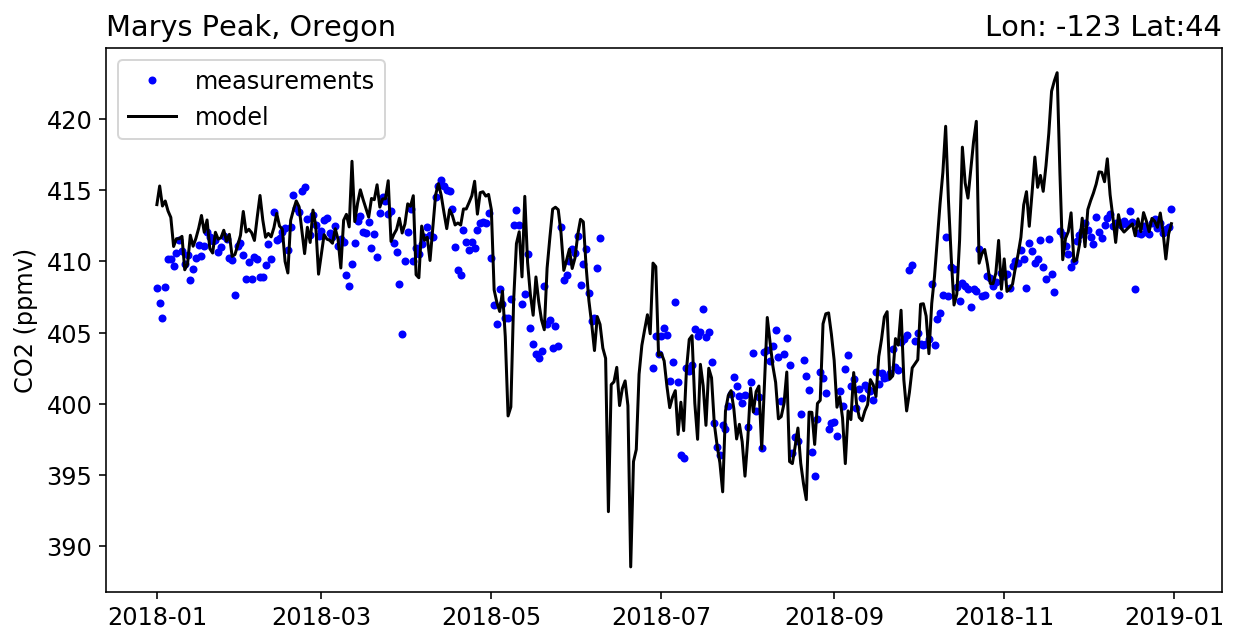

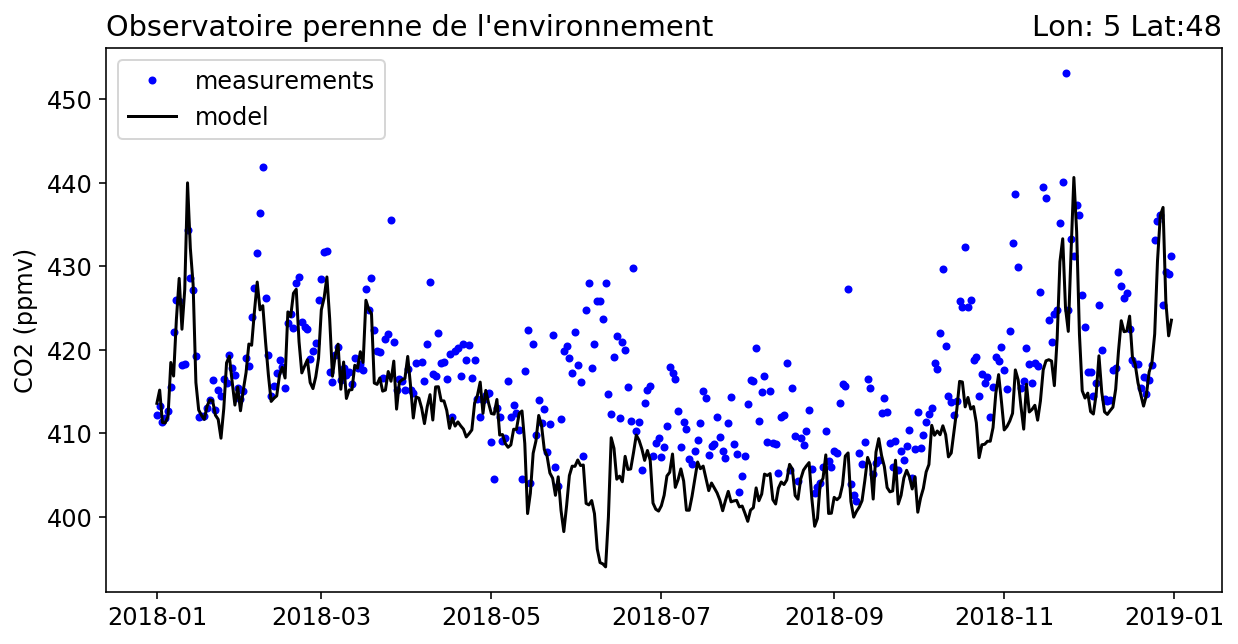

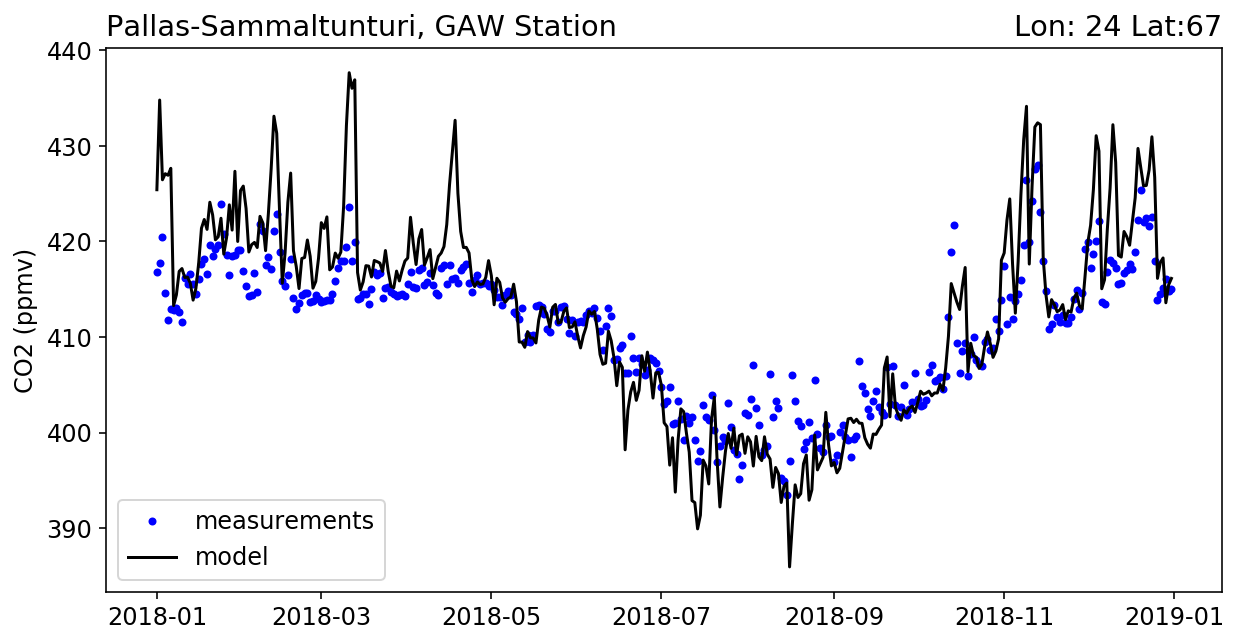

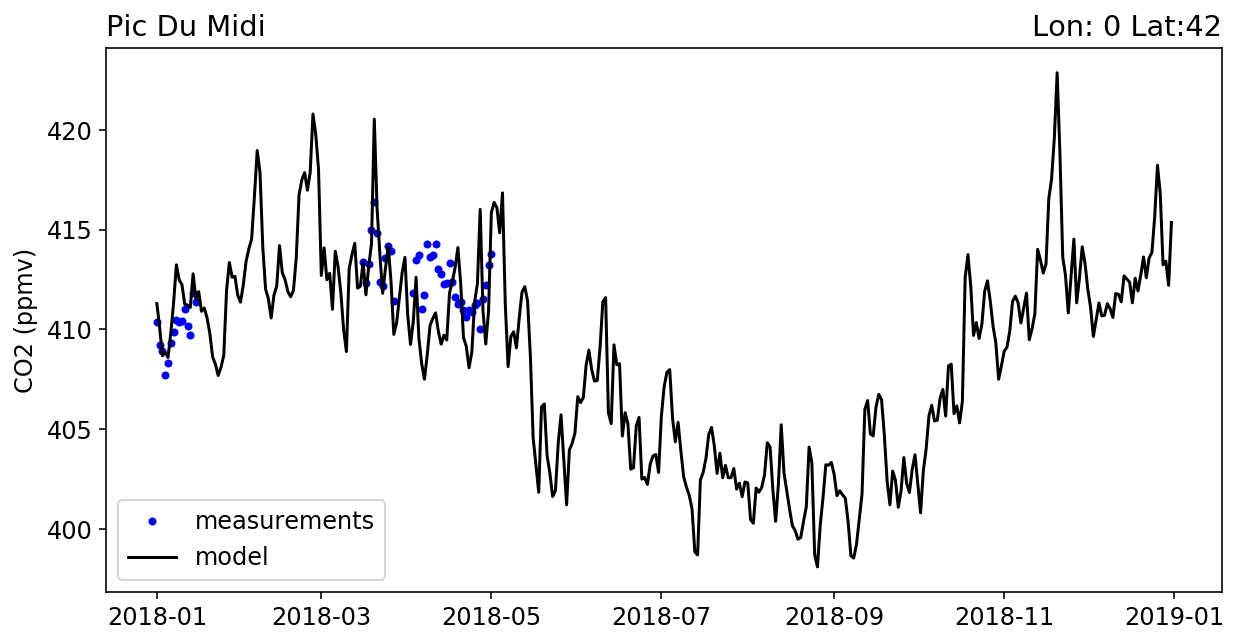

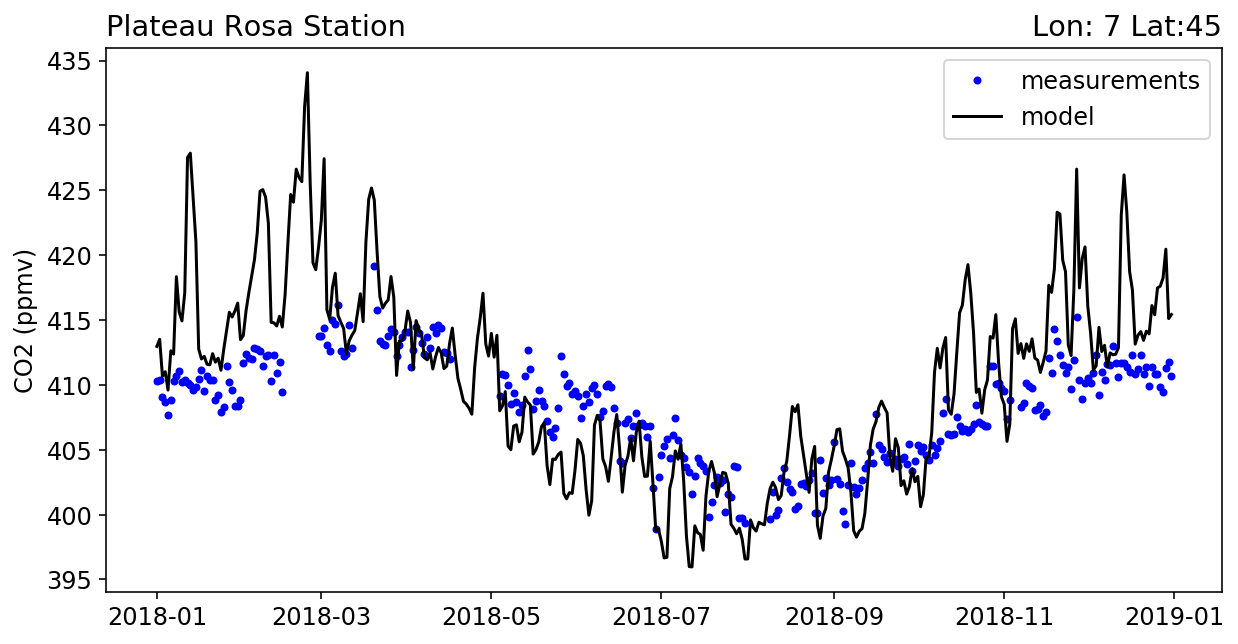

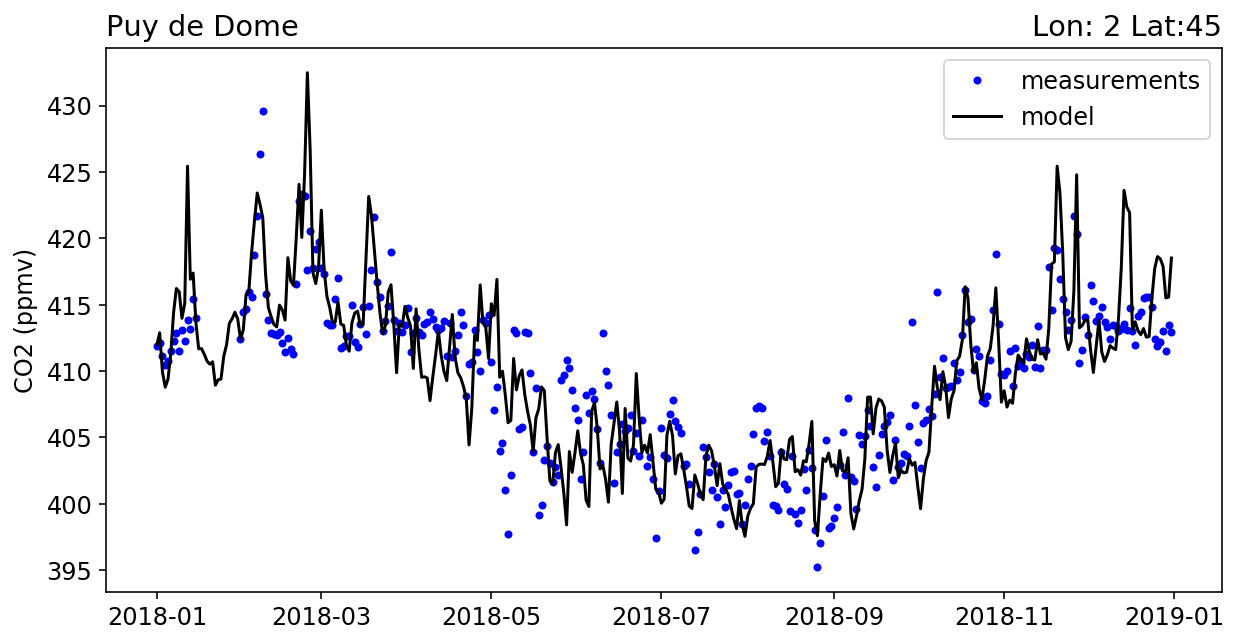

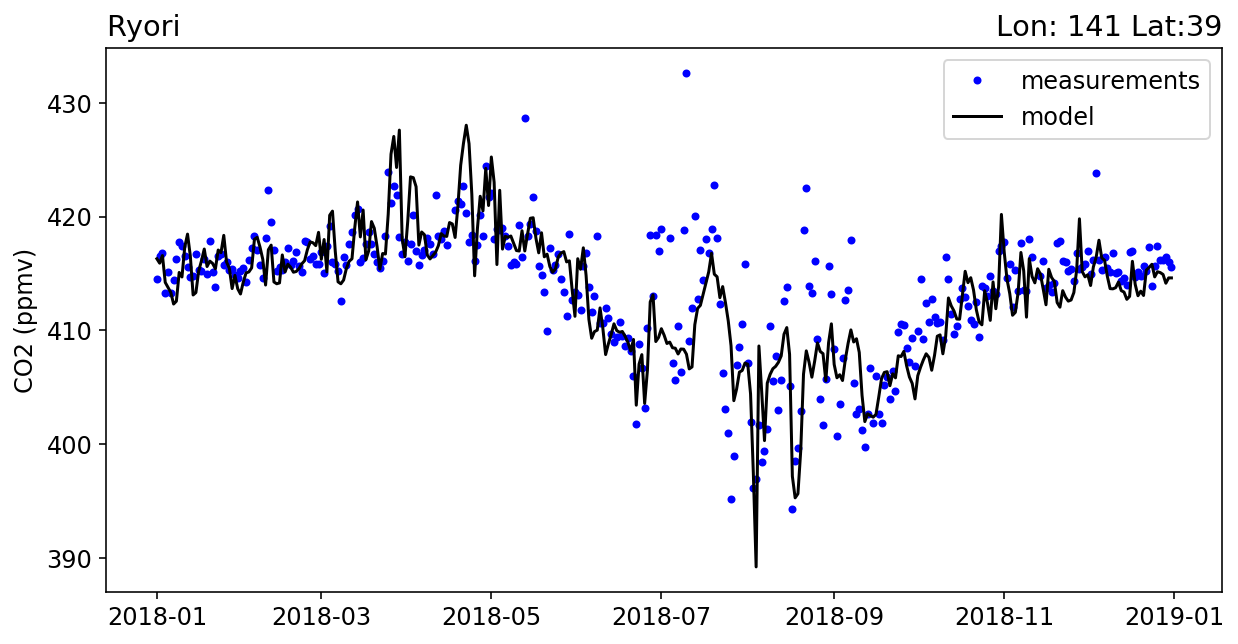

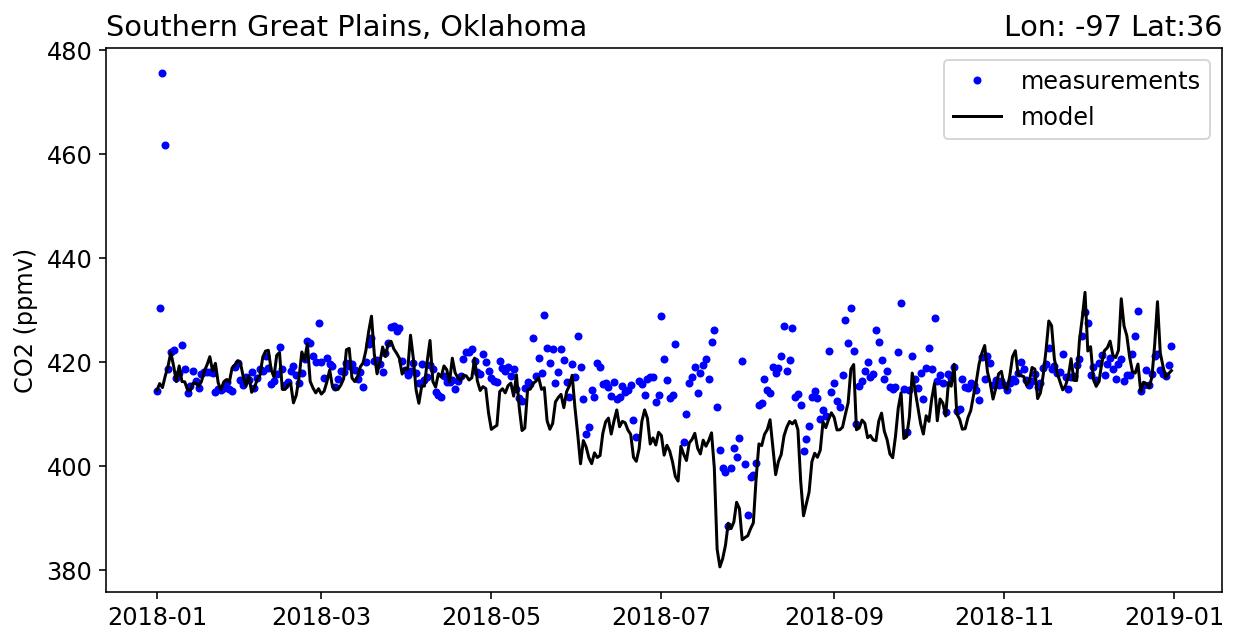

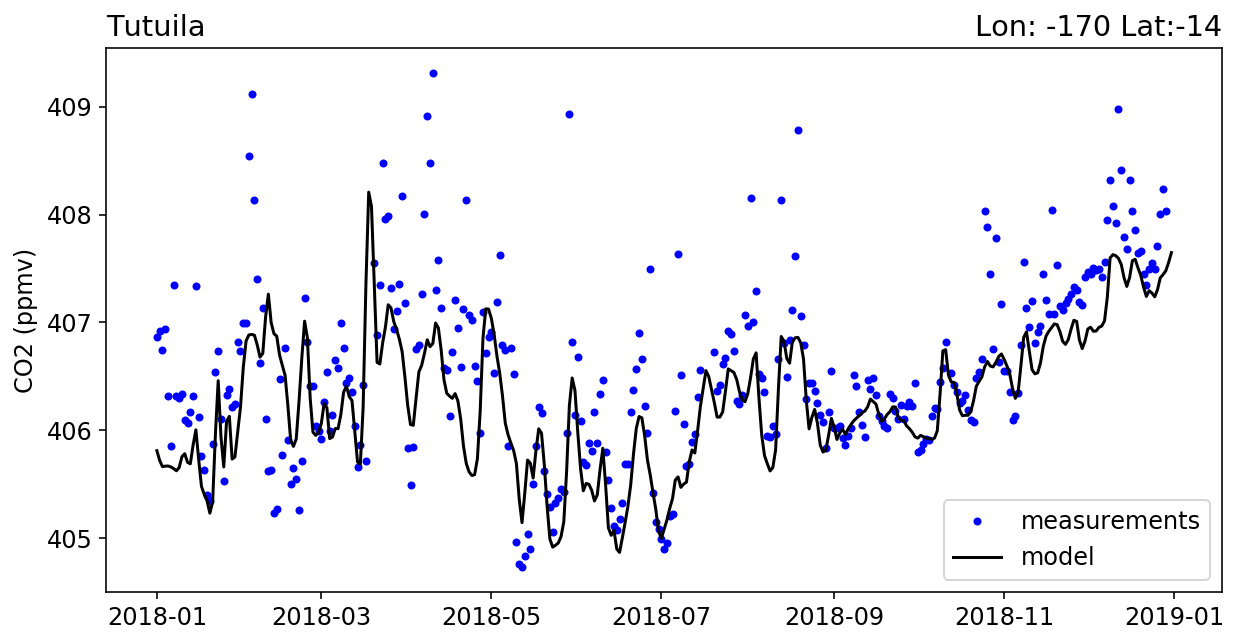

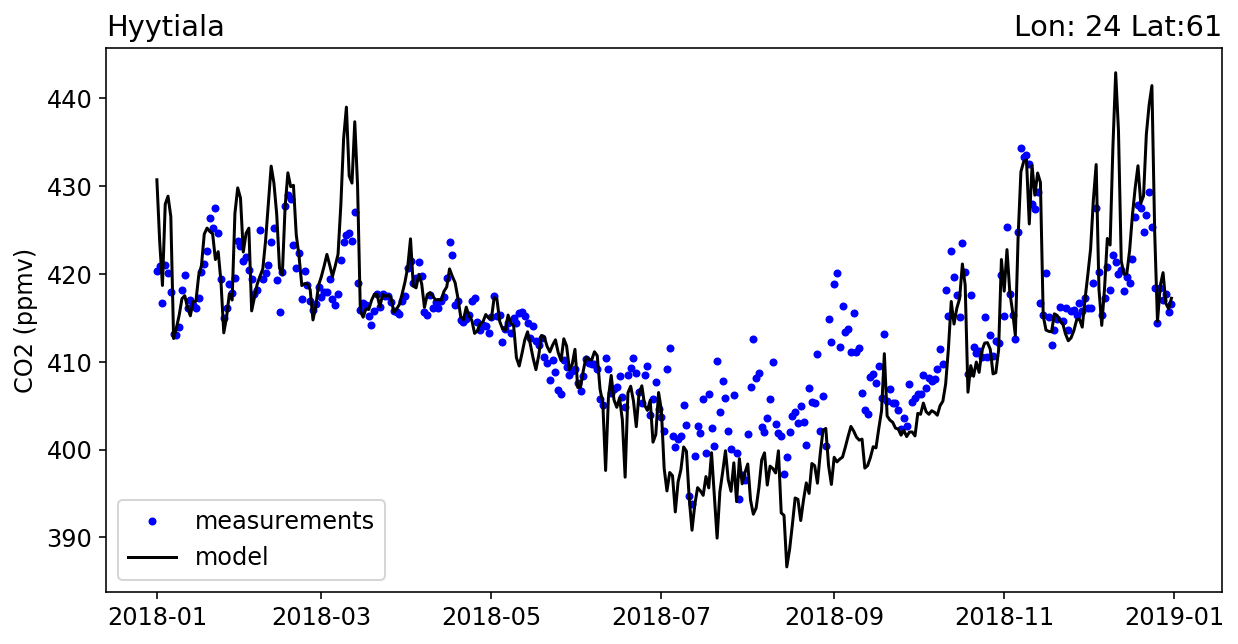

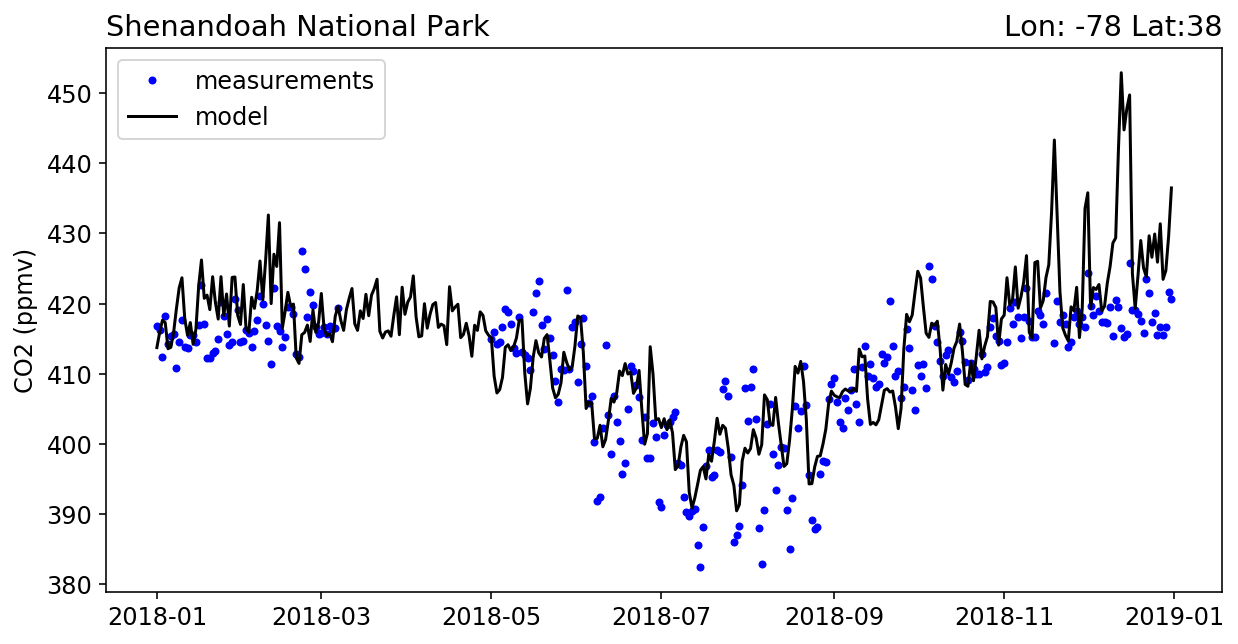

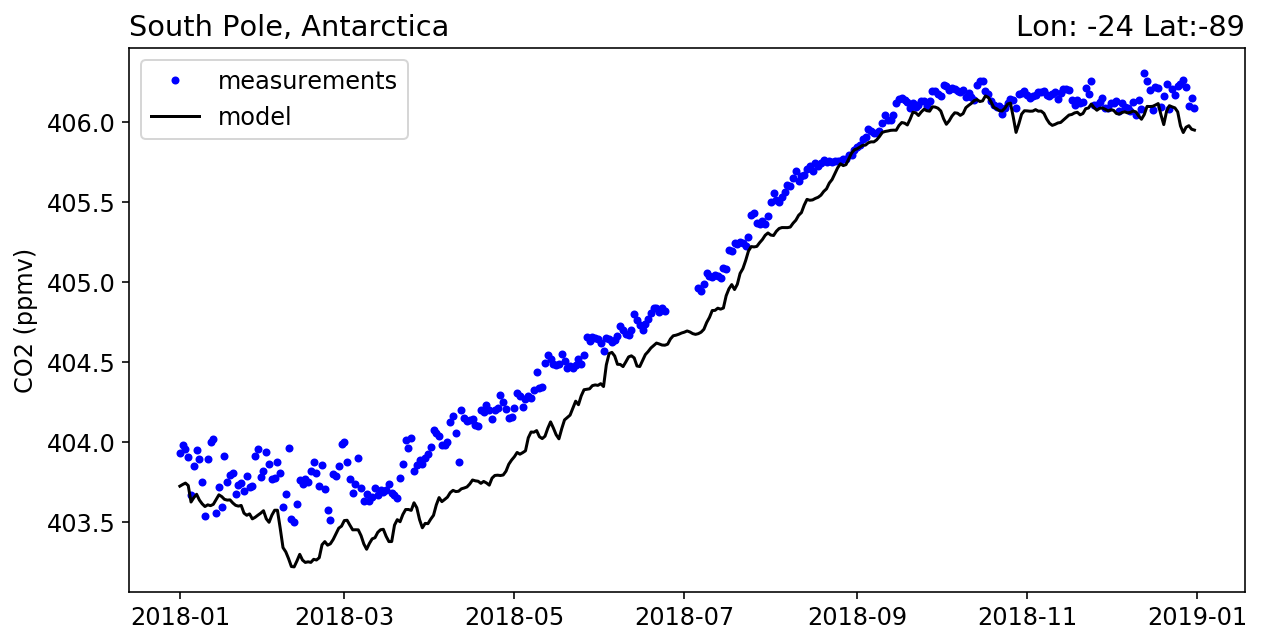

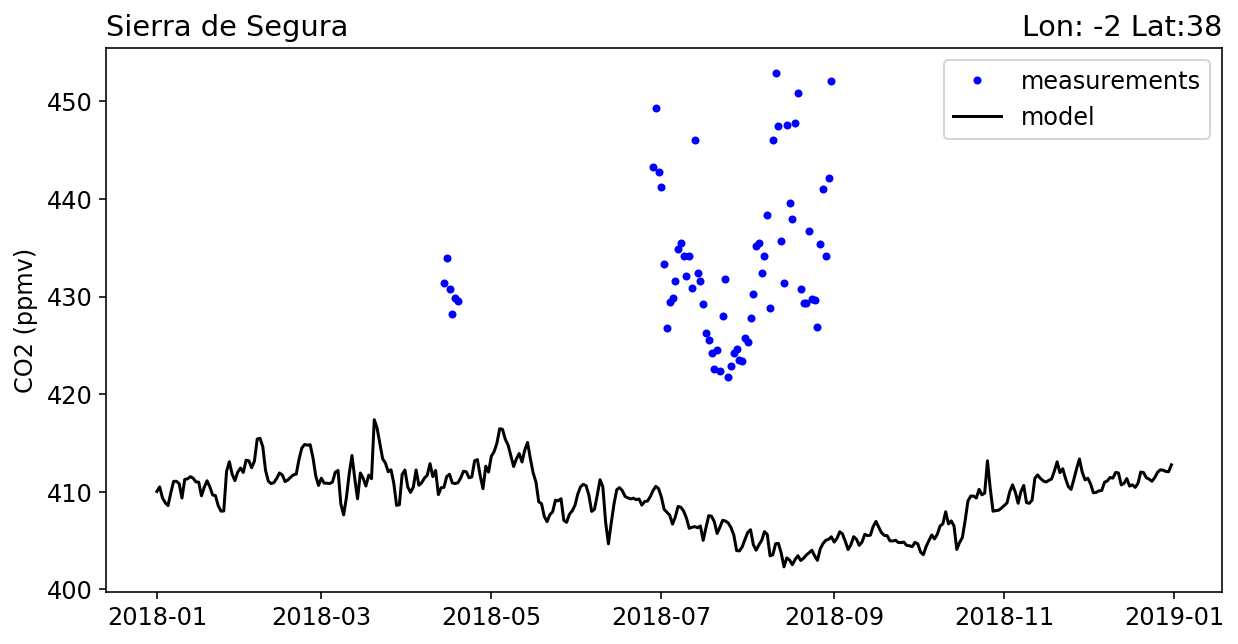

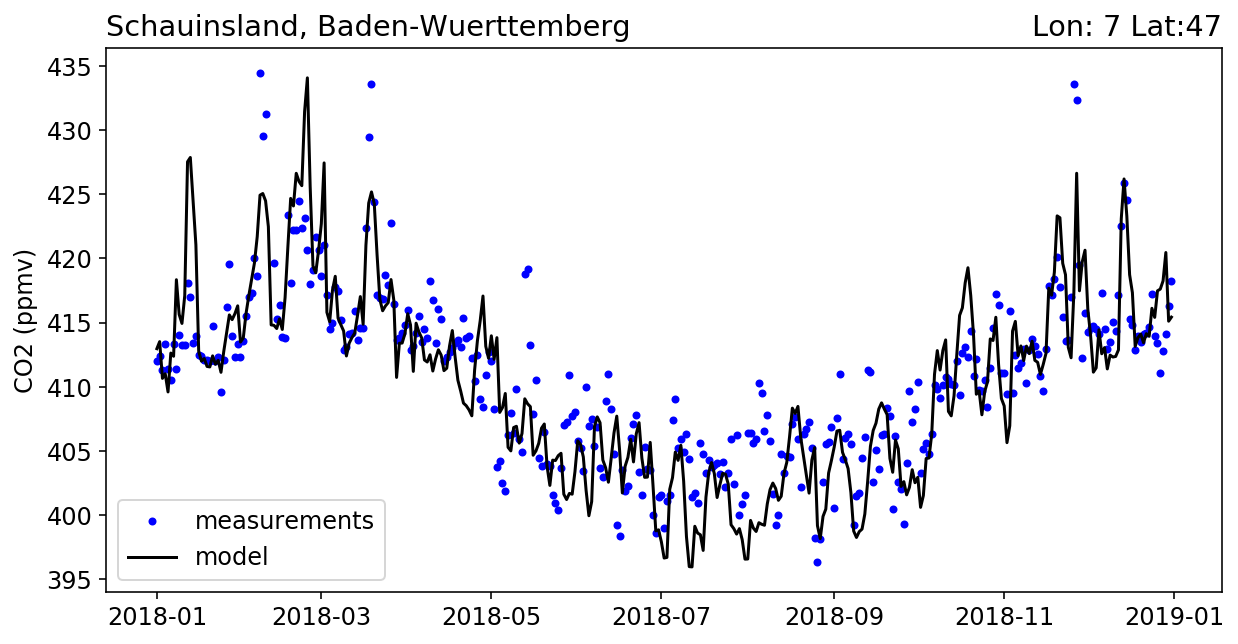

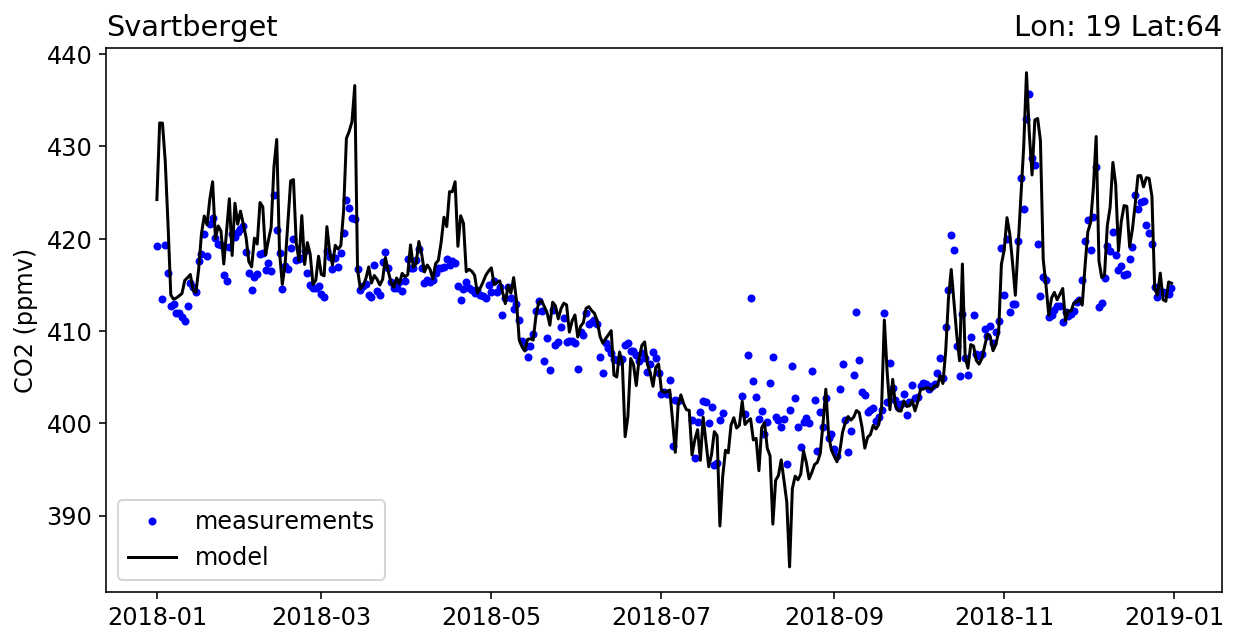

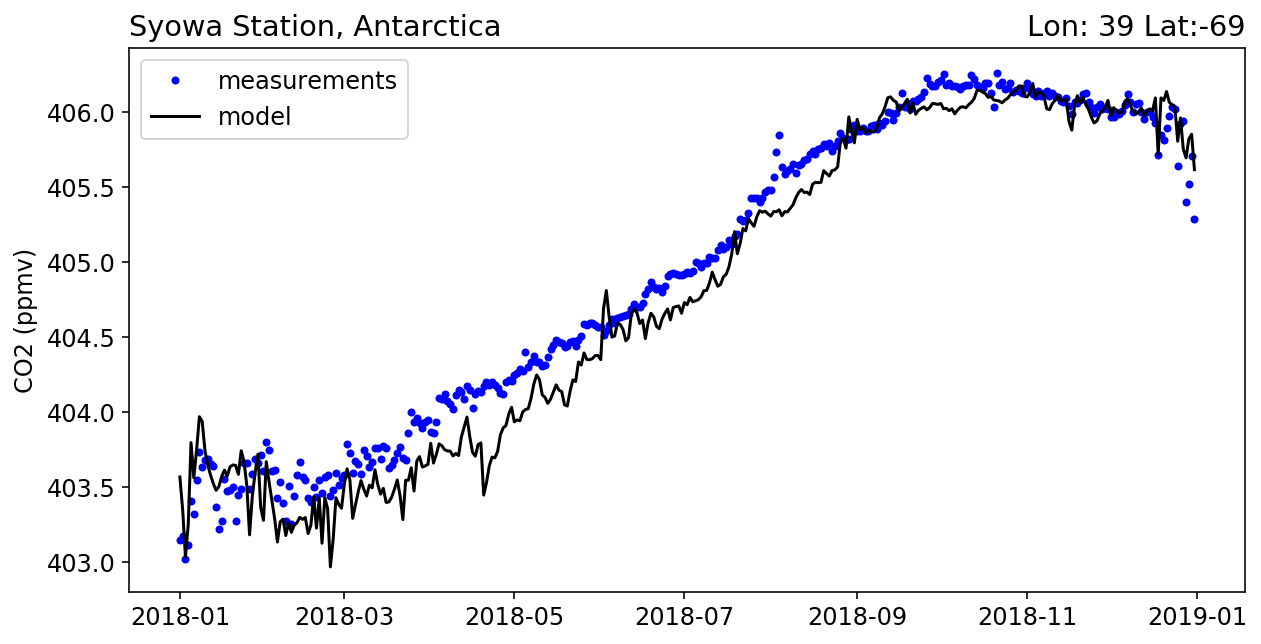

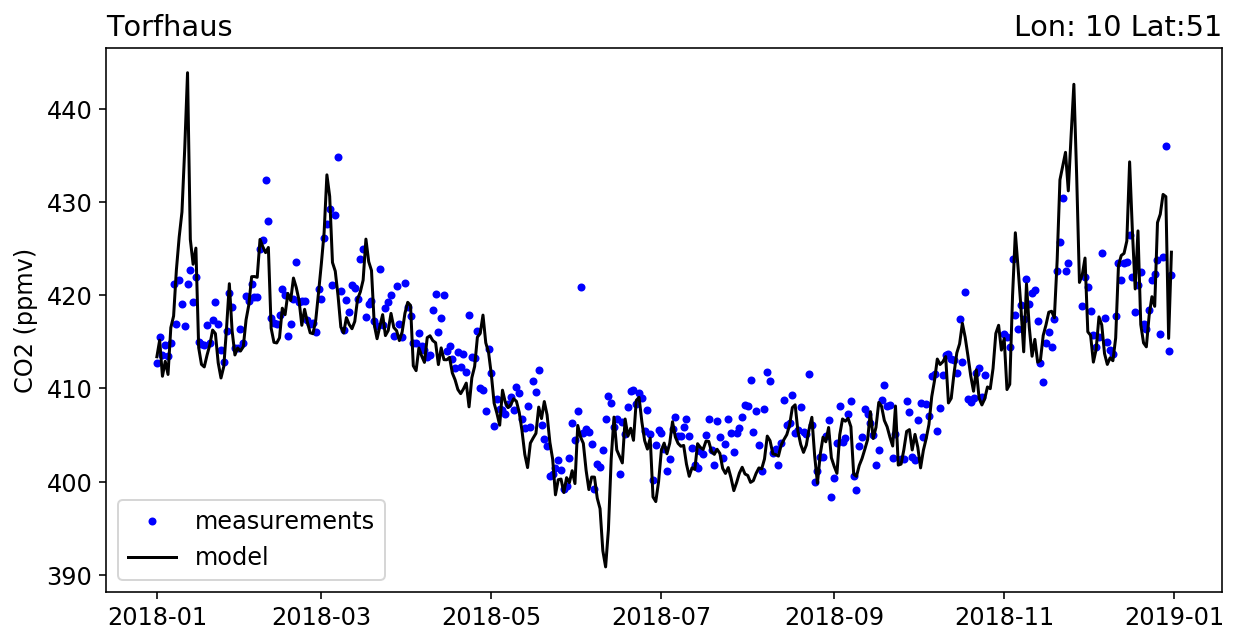

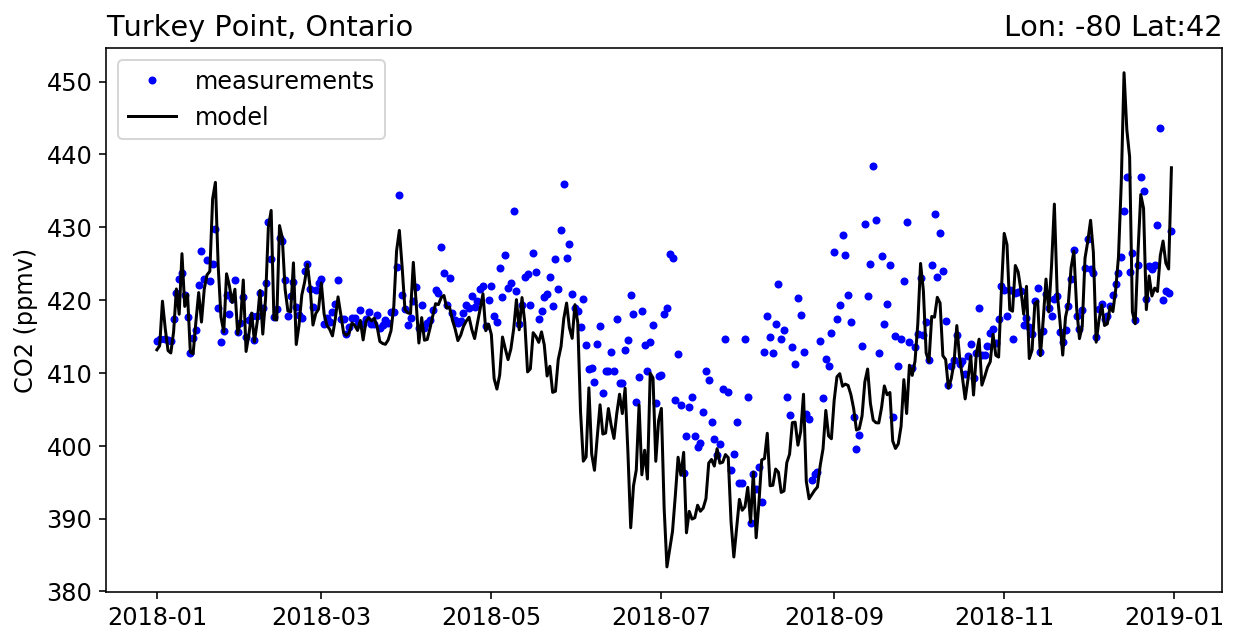

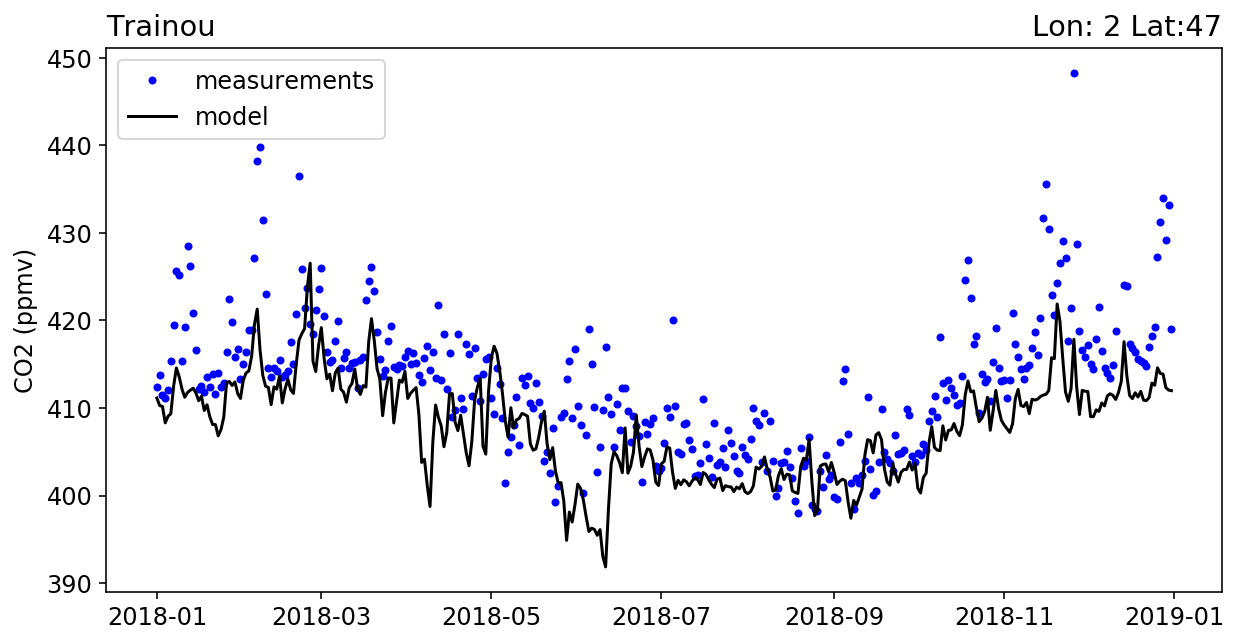

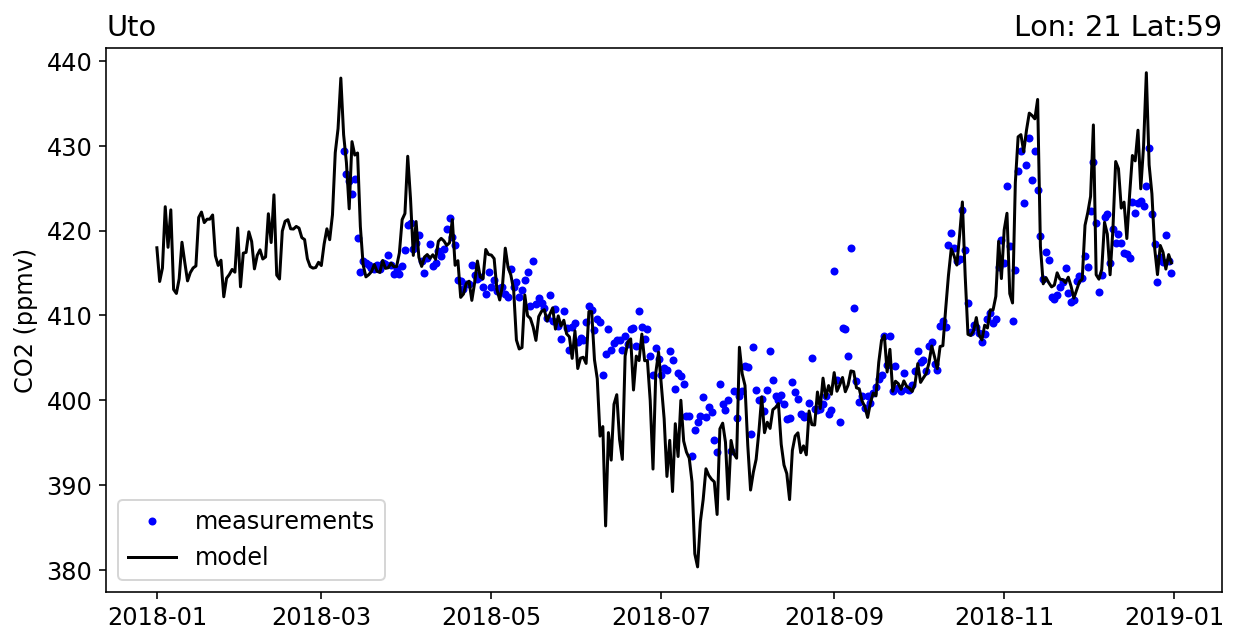

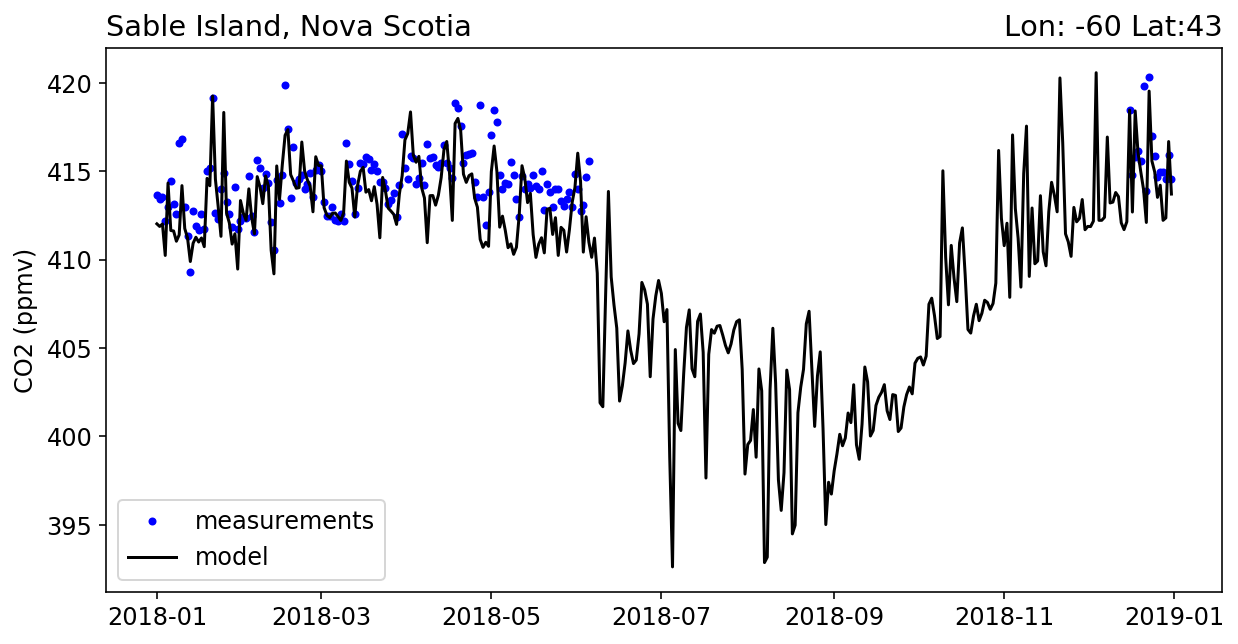

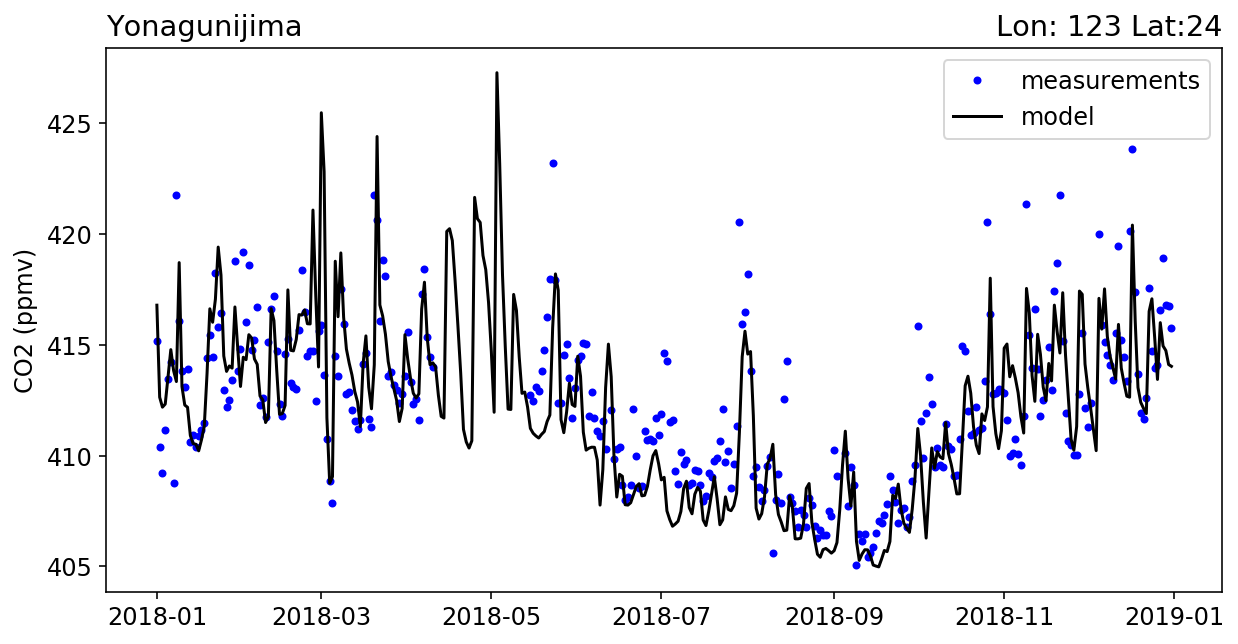

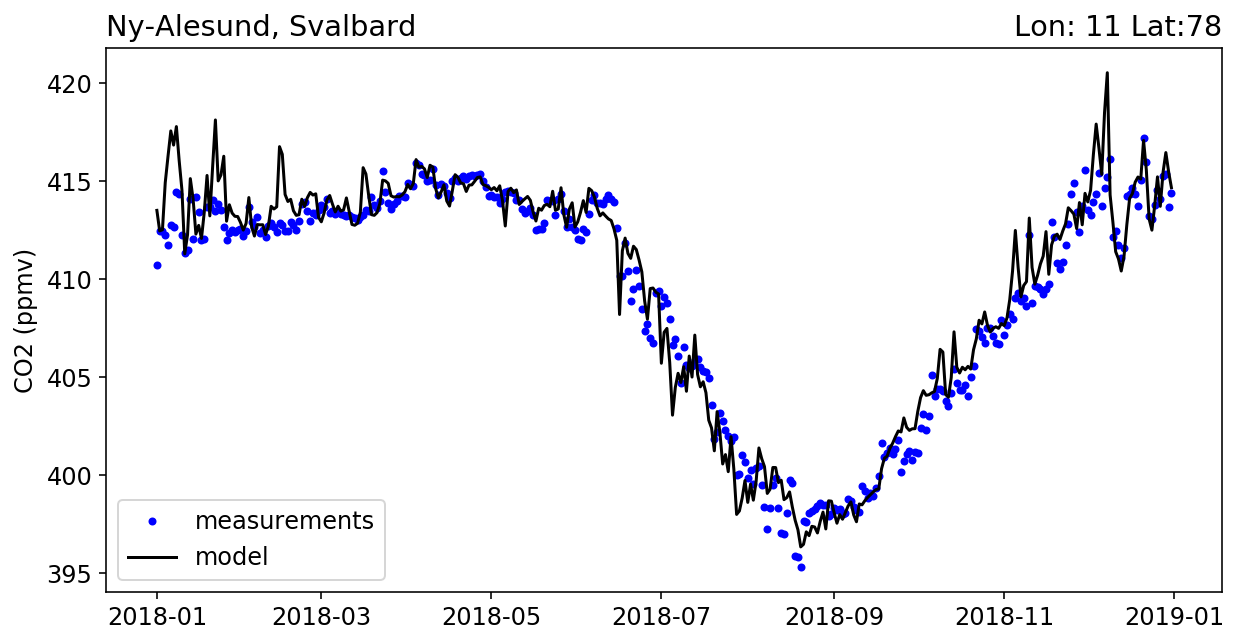

In [28]:
nm_loc = len(lines) # number of locations
for ifile in range(nm_loc):
    filename = lines[ifile].strip()
    ds_obs = xr.open_dataset(file_dir + filename)
    lon = ds_obs.attrs['site_longitude']
    lat = ds_obs.attrs['site_latitude']
    # extract the nearest grid point model output
    ts_model = daily_co2_mod.sel(longitude = lon, latitude = lat, method='nearest')*1e6
    
    ds_obs['obs'] = ds_obs['co2']
    ds_obs['mod'] = ds_obs['co2']
    ds_obs['mod'].values = ts_model.values
    
    obs_series = ds_obs['obs'].values
    model_series = ds_obs['mod'].values
    R = ma.corrcoef(ma.masked_invalid(obs_series), ma.masked_invalid(model_series))

    format_R = float("{0:.2f}".format(R[0,1]))
    print(format_R)

    fig = plt.figure(figsize=[10,5])
    plt.plot(ds_obs.date, ds_obs['obs'], 'b.', label = 'measurements')
    plt.plot(ds_obs.date, ds_obs['mod'], 'black', label = 'model')
    plt.legend()
    plt.title(ds_obs.attrs['site_name'], loc='left')
    plt.title('Lon: ' + str(int(lon)) + ' Lat:' + str(int(lat)), loc='right')
    plt.ylabel('CO2 (ppmv)')

    fig.savefig(mod_dir + '/plots/' + str(year) + '_' + ds_obs.attrs['site_code'] + '_mod_vs_obs.png', dpi=300)
    